<div style=" background-color: RGB(173,40,59);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 CRUDER LEA</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec R ou Python
</h2>

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies, chargement des fichiers</h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">1.1 - Importation des librairies</h3>

In [1]:
# Importation des librairies 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from scipy.stats import shapiro

import plotly.express as px

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">1.2 - Chargement des fichiers csv</h3>

In [2]:
# Importation du fichier dispo alimentaire

df_dispo_al = pd.read_csv('DisponibiliteAlimentaire_2017.csv', sep=';')

In [3]:
# Affichage du df

df_dispo_al

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [4]:
# Importation du fichier population

df_pop = pd.read_csv('Population_2000_2018.csv', sep=';')

In [5]:
# Affichage du df

df_pop

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [6]:
# Importation de fichiers supplémentaires (stabilité politique, inflation alimentaire, coût de la viande et PIB)

df_stab = pd.read_csv('stab_politique_2017.csv', sep=',')
df_pib_nat = pd.read_csv('pib_pays_1718.csv', sep=',')
df_pib_hab = pd.read_csv('pib_hab.csv', sep=',')
df_inflation = pd.read_csv('inflation_alimentaire_2017.csv', sep=',')
df_prix = pd.read_csv('cout_viande_pays.csv', sep=',')
df_poulet = pd.read_csv('infos_poulet.csv', sep=',')

In [7]:
# Importation de fichiers supplémentaires (coordonnées pays)

df_coord = pd.read_csv('country-coord.csv', sep=';', index_col=0)

In [8]:
df_stab

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,55088.60,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2096.10,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13950.50,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,FS,Données de la sécurité alimentaire,887,Yémen,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.94,X,Ciffre de sources internationales,NaN
380,FS,Données de la sécurité alimentaire,894,Zambie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,3395.50,X,Ciffre de sources internationales,NaN
381,FS,Données de la sécurité alimentaire,894,Zambie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.15,X,Ciffre de sources internationales,NaN
382,FS,Données de la sécurité alimentaire,716,Zimbabwe,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2331.80,X,Ciffre de sources internationales,NaN


In [9]:
df_pib_nat

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18896.352021,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,Millions d’USD,18418.848300,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,380851.444101,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,Millions d’USD,403945.686265,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,8,Albanie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,13019.729856,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,MK,Indicateurs macro,887,Yémen,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,Millions d’USD,26671.579499,X,Ciffre de sources internationales,NaN
418,MK,Indicateurs macro,894,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,25868.161487,X,Ciffre de sources internationales,NaN
419,MK,Indicateurs macro,894,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,Millions d’USD,26311.984736,X,Ciffre de sources internationales,NaN
420,MK,Indicateurs macro,716,Zimbabwe,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,22040.654699,X,Ciffre de sources internationales,NaN


In [10]:
df_pib_hab

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,55088.6,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,56060.9,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2096.1,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,2060.7,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13950.5,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,FS,Données de la sécurité alimentaire,704,Viet Nam,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,9636.0,X,Ciffre de sources internationales,NaN
372,FS,Données de la sécurité alimentaire,894,Zambie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,3395.5,X,Ciffre de sources internationales,NaN
373,FS,Données de la sécurité alimentaire,894,Zambie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,3425.9,X,Ciffre de sources internationales,NaN
374,FS,Données de la sécurité alimentaire,716,Zimbabwe,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2331.8,X,Ciffre de sources internationales,NaN


In [11]:
df_inflation 

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Code Élément,Élément,Unité,Valeur,Symbole,Description du Symbole,Note
0,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7001,Janvier,6121,Valeur,%,4.730651,E,Valeur estimée,NaN
1,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7002,Février,6121,Valeur,%,4.553673,E,Valeur estimée,NaN
2,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7003,Mars,6121,Valeur,%,10.028383,E,Valeur estimée,NaN
3,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7004,Avril,6121,Valeur,%,9.367880,E,Valeur estimée,NaN
4,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7005,Mai,6121,Valeur,%,10.723921,E,Valeur estimée,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7008,Août,6121,Valeur,%,1.838235,E,Valeur estimée,NaN
2432,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7009,Septembre,6121,Valeur,%,2.573529,E,Valeur estimée,NaN
2433,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7010,Octobre,6121,Valeur,%,4.395604,E,Valeur estimée,NaN
2434,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7011,Novembre,6121,Valeur,%,5.646630,E,Valeur estimée,NaN


In [12]:
df_prix

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,CAHD,Coût et abordabilité d’une alimentation saine\...,528,Pays-Bas (Royaume des),6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.614,E,Valeur estimée
1,CAHD,Coût et abordabilité d’une alimentation saine\...,710,Afrique du Sud,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,1.059,E,Valeur estimée
2,CAHD,Coût et abordabilité d’une alimentation saine\...,8,Albanie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,1.204,E,Valeur estimée
3,CAHD,Coût et abordabilité d’une alimentation saine\...,12,Algérie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.964,E,Valeur estimée
4,CAHD,Coût et abordabilité d’une alimentation saine\...,276,Allemagne,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.666,E,Valeur estimée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,CAHD,Coût et abordabilité d’une alimentation saine\...,792,Turquie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.817,E,Valeur estimée
165,CAHD,Coût et abordabilité d’une alimentation saine\...,858,Uruguay,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.615,E,Valeur estimée
166,CAHD,Coût et abordabilité d’une alimentation saine\...,704,Viet Nam,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,1.183,E,Valeur estimée
167,CAHD,Coût et abordabilité d’une alimentation saine\...,894,Zambie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.906,E,Valeur estimée


In [13]:
df_poulet

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5610,Importations - Quantité,1058,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,28937.00,A,Chiffre officiel
1,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5610,Importations - Quantité,1058,"Viande, poulet, fraîche ou réfrigérée",2018,2018,tonnes,23913.00,A,Chiffre officiel
2,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,665,Disponibilité alimentaire en quantité (g/perso...,1058,"Viande, poulet, fraîche ou réfrigérée",2017,2017,g/personne/jour,4.88,X,Ciffre de sources internationales
3,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,665,Disponibilité alimentaire en quantité (g/perso...,1058,"Viande, poulet, fraîche ou réfrigérée",2018,2018,g/personne/jour,3.95,X,Ciffre de sources internationales
4,SCL,Compte Disponibilités et Utilisations (CDU) (2...,710,Afrique du Sud,5610,Importations - Quantité,1058,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,480345.55,A,Chiffre officiel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,SCL,Compte Disponibilités et Utilisations (CDU) (2...,894,Zambie,665,Disponibilité alimentaire en quantité (g/perso...,1058,"Viande, poulet, fraîche ou réfrigérée",2018,2018,g/personne/jour,9.08,X,Ciffre de sources internationales
705,SCL,Compte Disponibilités et Utilisations (CDU) (2...,716,Zimbabwe,5610,Importations - Quantité,1058,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,5876.56,A,Chiffre officiel
706,SCL,Compte Disponibilités et Utilisations (CDU) (2...,716,Zimbabwe,5610,Importations - Quantité,1058,"Viande, poulet, fraîche ou réfrigérée",2018,2018,tonnes,3758.00,A,Chiffre officiel
707,SCL,Compte Disponibilités et Utilisations (CDU) (2...,716,Zimbabwe,665,Disponibilité alimentaire en quantité (g/perso...,1058,"Viande, poulet, fraîche ou réfrigérée",2017,2017,g/personne/jour,13.91,X,Ciffre de sources internationales


In [14]:
df_coord

,Latitude (average),Longitude (average)
Pays,,
Afghanistan,33.0,65.0
Afrique du Sud,-29.0,24.0
Albanie,41.0,20.0
Algérie,28.0,3.0
Allemagne,51.0,9.0
...,...,...
Venezuela (République bolivarienne du),8.0,-66.0
Viet Nam,16.0,106.0
Yémen,15.0,48.0


<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.1 - Analyse exploratoire du fichier population</h3>

In [15]:
# Affichage du df

df_pop

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [16]:
# Affichage des infos du dataset / recherche de valeurs nulles

df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [17]:
# Recherche de valeurs aberrantes

df_pop.describe(include='all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.000000,4411,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Afghanistan,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,4411,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,2009.068238,NaN,2.963004e+04,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,5.481539,NaN,1.238029e+05,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,2000.000000,NaN,7.850000e-01,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,2004.000000,NaN,3.921890e+02,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,2009.000000,NaN,4.764741e+03,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,2014.000000,NaN,1.821548e+04,NaN,NaN,NaN


In [18]:
# Conversion de la population 

df_pop['Population'] = (df_pop['Valeur']*1000).astype(int)

In [19]:
# Selection des années

df_pop17 = df_pop.loc[df_pop['Année'] == 2017,['Zone','Population']]
df_pop18 = df_pop.loc[df_pop['Année'] == 2018,['Zone','Population']]

In [20]:

df_pop17.rename(columns = {'Population':'Pop17'}, inplace=True)
df_pop17

,Zone,Pop17
17,Afghanistan,36296113
36,Afrique du Sud,57009756
55,Albanie,2884169
74,Algérie,41389189
93,Allemagne,82658409
...,...,...
4333,Venezuela (République bolivarienne du),29402484
4352,Viet Nam,94600648
4371,Yémen,27834819
4390,Zambie,16853599


In [21]:
df_pop18.rename(columns = {'Population':'Pop18'}, inplace=True)
df_pop18

,Zone,Pop18
18,Afghanistan,37171921
37,Afrique du Sud,57792518
56,Albanie,2882740
75,Algérie,42228408
94,Allemagne,83124418
...,...,...
4334,Venezuela (République bolivarienne du),28887118
4353,Viet Nam,95545962
4372,Yémen,28498683
4391,Zambie,17351708


In [22]:
df_pop1718 = df_pop17.merge(df_pop18, on='Zone', how='inner')
df_pop1718

,Zone,Pop17,Pop18
0,Afghanistan,36296113,37171921
1,Afrique du Sud,57009756,57792518
2,Albanie,2884169,2882740
3,Algérie,41389189,42228408
4,Allemagne,82658409,83124418
...,...,...,...
231,Venezuela (République bolivarienne du),29402484,28887118
232,Viet Nam,94600648,95545962
233,Yémen,27834819,28498683
234,Zambie,16853599,17351708


In [23]:
df_pop1718['Evolution_pop'] =  ((df_pop1718['Pop18']-df_pop1718['Pop17'])/df_pop1718['Pop17'])*100

In [24]:
df_pop = df_pop1718[['Zone','Evolution_pop']]

In [25]:
df_pop

,Zone,Evolution_pop
0,Afghanistan,2.412953
1,Afrique du Sud,1.373032
2,Albanie,-0.049546
3,Algérie,2.027629
4,Allemagne,0.563777
...,...,...
231,Venezuela (République bolivarienne du),-1.752797
232,Viet Nam,0.999268
233,Yémen,2.385013
234,Zambie,2.955505


In [26]:
# Recherche de doublons sur les lignes entières

df_pop.duplicated().sum()

0

In [27]:
# Recherche de doublons sur le pays

df_pop.loc[df_pop1718[['Zone']].duplicated(keep=False),:]

,Zone,Evolution_pop


In [28]:
# Verif Chine

df_pop.loc[df_pop['Zone'].str.contains('Chine'),:]

,Zone,Evolution_pop
41,Chine - RAS de Hong-Kong,0.895225
42,Chine - RAS de Macao,1.453777
43,"Chine, continentale",0.466284
44,"Chine, Taiwan Province de",0.219282


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.2 - Analyse exploratoire du fichier dispo alimentaire</h3>

In [29]:
# Affichage du df

df_dispo_al

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [30]:
# Affichage des infos du dataset / recherche de valeurs nulles

df_dispo_al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [31]:
# Recherche de valeurs aberrantes

df_dispo_al.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [32]:
# Recherche des valeurs négatives

df_dispo_al.loc[df_dispo_al['Valeur'] <0 ]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
43,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2514,Maïs et produits,2017,2017,Milliers de tonnes,-21.0,S,Données standardisées
70,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2517,Millet et produits,2017,2017,Milliers de tonnes,-1.0,S,Données standardisées
110,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2535,Ignames,2017,2017,Milliers de tonnes,-1.0,S,Données standardisées
169,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2546,Haricots,2017,2017,Milliers de tonnes,-33.0,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176003,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5072,Variation de stock,2577,Huile de Palme,2017,2017,Milliers de tonnes,-1.0,S,Données standardisées
176275,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5072,Variation de stock,2641,Piments,2017,2017,Milliers de tonnes,-1.0,S,Données standardisées
176356,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5072,Variation de stock,2731,Viande de Bovins,2017,2017,Milliers de tonnes,-1.0,S,Données standardisées
176379,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5072,Variation de stock,2733,Viande de Suides,2017,2017,Milliers de tonnes,-1.0,S,Données standardisées


In [33]:
# Recherche d'infos

print(df_dispo_al['Élément'].unique())

['Production' 'Importations - Quantité' 'Variation de stock'
 'Exportations - Quantité' 'Disponibilité intérieure'
 'Aliments pour animaux' 'Semences' 'Pertes' 'Résidus' 'Nourriture'
 'Disponibilité alimentaire en quantité (kg/personne/an)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'
 'Traitement' 'Autres utilisations (non alimentaire)'
 'Alimentation pour touristes']


### Liens dans les données : 
****

**Disponibilité intérieure** = Production + Importations + Variations de stock - Exportations

**Utilisation de la dispo** = Aliments pour animaux + Semences + Pertes + Résidus + Nourriture + Traitement +
Alimentation pour touristes + Autres utilisations (non alimentaire)

****

Nous allons récupérer les données nécessaires pour calculer le **Taux d'Auto-Suffisance (TAS)** et le **Taux de Dépendance aux Importations (TDI)** 

Calculs : 

**TDI = Importations / (Production + Importations - Exportations + Variations de stock, donc la disponibilité intérieure) x 100**

**TAS = Production / (Production + Importations - Exportations + Variations de stock, donc la disponibilité intérieure) x 100**

In [34]:
# Recherche d'infos concernant les volailles

print(df_dispo_al['Produit'].unique())

['Blé et produits' 'Riz et produits' 'Orge et produits' 'Maïs et produits'
 'Seigle et produits' 'Avoine' 'Millet et produits' 'Sorgho et produits'
 'Céréales, Autres' 'Pommes de Terre et produits' 'Ignames' 'Racines nda'
 'Sucre, canne' 'Sucre, betterave' 'Sucre Eq Brut' 'Edulcorants Autres'
 'Miel' 'Haricots' 'Pois' 'Légumineuses Autres et produits'
 'Noix et produits' 'Soja' 'Arachides Decortiquees' 'Graines de tournesol'
 'Graines Colza/Moutarde' 'Graines de coton' 'Coco (Incl Coprah)' 'Sésame'
 'Olives' 'Plantes Oleiferes, Autre' 'Huile de Soja' "Huile d'Arachide"
 'Huile de Tournesol' 'Huile de Colza&Moutarde' 'Huile Graines de Coton'
 'Huile de Palmistes' 'Huile de Palme' 'Huile de Coco' 'Huile de Sésame'
 "Huile d'Olive" 'Huile de Son de Riz' 'Huile de Germe de Maïs'
 'Huil Plantes Oleif Autr' 'Tomates et produits' 'Oignons'
 'Légumes, Autres' 'Oranges, Mandarines' 'Citrons & Limes et produits'
 'Pamplemousse et produits' 'Agrumes, Autres' 'Bananes'
 'Pommes et produits' 'Anana

In [35]:
# Création d'un df 

df_volailles = df_dispo_al.loc[df_dispo_al['Produit'].str.contains('Viande de Volailles')]
df_volailles

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176396,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,67.00,S,Données standardisées
176397,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,4.68,Fc,Donnée calculée
176398,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,16.00,Fc,Donnée calculée
176399,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,1.59,Fc,Donnée calculée


In [36]:
print(df_dispo_al['Unité'].unique())

['Milliers de tonnes' 'kg' 'Kcal/personne/jour' 'g/personne/jour']


In [37]:
print(df_dispo_al['Élément'].unique())

['Production' 'Importations - Quantité' 'Variation de stock'
 'Exportations - Quantité' 'Disponibilité intérieure'
 'Aliments pour animaux' 'Semences' 'Pertes' 'Résidus' 'Nourriture'
 'Disponibilité alimentaire en quantité (kg/personne/an)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'
 'Traitement' 'Autres utilisations (non alimentaire)'
 'Alimentation pour touristes']


In [38]:
# Création d'un df sur les importations de volailles

df_importation = df_dispo_al.loc[(df_dispo_al['Élément'] == 'Importations - Quantité') & (df_dispo_al['Produit'] == 'Viande de Volailles'),:]
df_importation

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
1705,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,514.0,S,Données standardisées
2714,FBS,Nouveaux Bilans Alimentaire,3,Albanie,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,38.0,S,Données standardisées
3773,FBS,Nouveaux Bilans Alimentaire,4,Algérie,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées
4874,FBS,Nouveaux Bilans Alimentaire,79,Allemagne,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,842.0,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172329,FBS,Nouveaux Bilans Alimentaire,236,Venezuela (République bolivarienne du),5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,25.0,S,Données standardisées
173388,FBS,Nouveaux Bilans Alimentaire,237,Viet Nam,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,291.0,S,Données standardisées
174319,FBS,Nouveaux Bilans Alimentaire,249,Yémen,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,78.0,S,Données standardisées
175362,FBS,Nouveaux Bilans Alimentaire,251,Zambie,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,12.0,S,Données standardisées


In [39]:
print(df_importation['Unité'].unique())

['Milliers de tonnes']


In [40]:
# Conversion en tonnes

df_importation['Importations_tonnes'] = (df_importation['Valeur'].copy()*1000).astype('int')
df_importation

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\3947750568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importation['Importations_tonnes'] = (df_importation['Valeur'].copy()*1000).astype('int')


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Importations_tonnes
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées,29000
1705,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,514.0,S,Données standardisées,514000
2714,FBS,Nouveaux Bilans Alimentaire,3,Albanie,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,38.0,S,Données standardisées,38000
3773,FBS,Nouveaux Bilans Alimentaire,4,Algérie,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées,2000
4874,FBS,Nouveaux Bilans Alimentaire,79,Allemagne,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,842.0,S,Données standardisées,842000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172329,FBS,Nouveaux Bilans Alimentaire,236,Venezuela (République bolivarienne du),5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,25.0,S,Données standardisées,25000
173388,FBS,Nouveaux Bilans Alimentaire,237,Viet Nam,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,291.0,S,Données standardisées,291000
174319,FBS,Nouveaux Bilans Alimentaire,249,Yémen,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,78.0,S,Données standardisées,78000
175362,FBS,Nouveaux Bilans Alimentaire,251,Zambie,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,12.0,S,Données standardisées,12000


In [41]:
# Suppression colonnes inutiles

df_importation.drop(df_importation.columns.difference(['Zone', 'Importations_tonnes']), axis = 1, inplace = True)

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\100606967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importation.drop(df_importation.columns.difference(['Zone', 'Importations_tonnes']), axis = 1, inplace = True)


In [42]:
df_importation

,Zone,Importations_tonnes
652,Afghanistan,29000
1705,Afrique du Sud,514000
2714,Albanie,38000
3773,Algérie,2000
4874,Allemagne,842000
...,...,...
172329,Venezuela (République bolivarienne du),25000
173388,Viet Nam,291000
174319,Yémen,78000
175362,Zambie,12000


In [43]:
# Création d'un df sur les exportations de volailles

df_exportation = df_dispo_al.loc[(df_dispo_al['Élément'] == 'Exportations - Quantité') & (df_dispo_al['Produit'] == 'Viande de Volailles'),:]
df_exportation

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
1707,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,63.0,S,Données standardisées
2716,FBS,Nouveaux Bilans Alimentaire,3,Albanie,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
3775,FBS,Nouveaux Bilans Alimentaire,4,Algérie,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4876,FBS,Nouveaux Bilans Alimentaire,79,Allemagne,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,646.0,S,Données standardisées
5936,FBS,Nouveaux Bilans Alimentaire,7,Angola,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170332,FBS,Nouveaux Bilans Alimentaire,234,Uruguay,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,3.0,S,Données standardisées
172331,FBS,Nouveaux Bilans Alimentaire,236,Venezuela (République bolivarienne du),5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
173390,FBS,Nouveaux Bilans Alimentaire,237,Viet Nam,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1.0,S,Données standardisées
174321,FBS,Nouveaux Bilans Alimentaire,249,Yémen,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées


In [44]:
print(df_exportation['Unité'].unique())

['Milliers de tonnes']


In [45]:
# Conversion en tonnes

df_exportation['Exportations_tonnes'] = (df_exportation['Valeur'].copy()*1000).astype('int')
df_exportation

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\127474585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exportation['Exportations_tonnes'] = (df_exportation['Valeur'].copy()*1000).astype('int')


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Exportations_tonnes
1707,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,63.0,S,Données standardisées,63000
2716,FBS,Nouveaux Bilans Alimentaire,3,Albanie,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées,0
3775,FBS,Nouveaux Bilans Alimentaire,4,Algérie,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées,0
4876,FBS,Nouveaux Bilans Alimentaire,79,Allemagne,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,646.0,S,Données standardisées,646000
5936,FBS,Nouveaux Bilans Alimentaire,7,Angola,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170332,FBS,Nouveaux Bilans Alimentaire,234,Uruguay,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,3.0,S,Données standardisées,3000
172331,FBS,Nouveaux Bilans Alimentaire,236,Venezuela (République bolivarienne du),5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées,0
173390,FBS,Nouveaux Bilans Alimentaire,237,Viet Nam,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1.0,S,Données standardisées,1000
174321,FBS,Nouveaux Bilans Alimentaire,249,Yémen,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées,0


In [46]:
# Suppression colonnes inutiles

df_exportation.drop(df_exportation.columns.difference(['Zone', 'Exportations_tonnes']), axis = 1, inplace = True)

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\2878582780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exportation.drop(df_exportation.columns.difference(['Zone', 'Exportations_tonnes']), axis = 1, inplace = True)


In [47]:
df_exportation

,Zone,Exportations_tonnes
1707,Afrique du Sud,63000
2716,Albanie,0
3775,Algérie,0
4876,Allemagne,646000
5936,Angola,0
...,...,...
170332,Uruguay,3000
172331,Venezuela (République bolivarienne du),0
173390,Viet Nam,1000
174321,Yémen,0


In [48]:
# Création d'un df sur la production de volailles

df_prod = df_dispo_al.loc[(df_dispo_al['Élément'] == 'Production') & (df_dispo_al['Produit'] == 'Viande de Volailles'),:]
df_prod

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
1704,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1667.0,S,Données standardisées
2713,FBS,Nouveaux Bilans Alimentaire,3,Albanie,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,13.0,S,Données standardisées
3772,FBS,Nouveaux Bilans Alimentaire,4,Algérie,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,275.0,S,Données standardisées
4873,FBS,Nouveaux Bilans Alimentaire,79,Allemagne,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1514.0,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172328,FBS,Nouveaux Bilans Alimentaire,236,Venezuela (République bolivarienne du),5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,600.0,S,Données standardisées
173387,FBS,Nouveaux Bilans Alimentaire,237,Viet Nam,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,918.0,S,Données standardisées
174318,FBS,Nouveaux Bilans Alimentaire,249,Yémen,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,168.0,S,Données standardisées
175361,FBS,Nouveaux Bilans Alimentaire,251,Zambie,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,49.0,S,Données standardisées


In [49]:
print(df_prod['Unité'].unique())

['Milliers de tonnes']


In [50]:
# Conversion en tonnes

df_prod['Production_tonnes'] = (df_prod['Valeur'].copy()*1000).astype('int')
df_prod

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\3193995879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod['Production_tonnes'] = (df_prod['Valeur'].copy()*1000).astype('int')


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Production_tonnes
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées,28000
1704,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1667.0,S,Données standardisées,1667000
2713,FBS,Nouveaux Bilans Alimentaire,3,Albanie,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,13.0,S,Données standardisées,13000
3772,FBS,Nouveaux Bilans Alimentaire,4,Algérie,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,275.0,S,Données standardisées,275000
4873,FBS,Nouveaux Bilans Alimentaire,79,Allemagne,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1514.0,S,Données standardisées,1514000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172328,FBS,Nouveaux Bilans Alimentaire,236,Venezuela (République bolivarienne du),5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,600.0,S,Données standardisées,600000
173387,FBS,Nouveaux Bilans Alimentaire,237,Viet Nam,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,918.0,S,Données standardisées,918000
174318,FBS,Nouveaux Bilans Alimentaire,249,Yémen,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,168.0,S,Données standardisées,168000
175361,FBS,Nouveaux Bilans Alimentaire,251,Zambie,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,49.0,S,Données standardisées,49000


In [51]:
# Suppression colonnes inutiles

df_prod.drop(df_prod.columns.difference(['Zone', 'Production_tonnes']), axis = 1, inplace = True)

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\4181262836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod.drop(df_prod.columns.difference(['Zone', 'Production_tonnes']), axis = 1, inplace = True)


In [52]:
df_prod

,Zone,Production_tonnes
651,Afghanistan,28000
1704,Afrique du Sud,1667000
2713,Albanie,13000
3772,Algérie,275000
4873,Allemagne,1514000
...,...,...
172328,Venezuela (République bolivarienne du),600000
173387,Viet Nam,918000
174318,Yémen,168000
175361,Zambie,49000


In [53]:
# Création d'un df sur la dispo_pays

df_dispo_pays = df_dispo_al.loc[(df_dispo_al['Élément'] == 'Disponibilité intérieure') & (df_dispo_al['Produit'] == 'Viande de Volailles'),:]
df_dispo_pays

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
1708,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2118.0,S,Données standardisées
2717,FBS,Nouveaux Bilans Alimentaire,3,Albanie,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,47.0,S,Données standardisées
3776,FBS,Nouveaux Bilans Alimentaire,4,Algérie,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,277.0,S,Données standardisées
4877,FBS,Nouveaux Bilans Alimentaire,79,Allemagne,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1739.0,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172332,FBS,Nouveaux Bilans Alimentaire,236,Venezuela (République bolivarienne du),5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,626.0,S,Données standardisées
173391,FBS,Nouveaux Bilans Alimentaire,237,Viet Nam,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1206.0,S,Données standardisées
174322,FBS,Nouveaux Bilans Alimentaire,249,Yémen,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,246.0,S,Données standardisées
175365,FBS,Nouveaux Bilans Alimentaire,251,Zambie,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,60.0,S,Données standardisées


In [54]:
print(df_dispo_pays['Unité'].unique())

['Milliers de tonnes']


In [55]:
# Conversion en tonnes

df_dispo_pays['Disponibilite_nationale_tonnes'] = (df_dispo_pays['Valeur'].copy()*1000).astype('int')
df_dispo_pays

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\2964385482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dispo_pays['Disponibilite_nationale_tonnes'] = (df_dispo_pays['Valeur'].copy()*1000).astype('int')


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Disponibilite_nationale_tonnes
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées,57000
1708,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2118.0,S,Données standardisées,2118000
2717,FBS,Nouveaux Bilans Alimentaire,3,Albanie,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,47.0,S,Données standardisées,47000
3776,FBS,Nouveaux Bilans Alimentaire,4,Algérie,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,277.0,S,Données standardisées,277000
4877,FBS,Nouveaux Bilans Alimentaire,79,Allemagne,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1739.0,S,Données standardisées,1739000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172332,FBS,Nouveaux Bilans Alimentaire,236,Venezuela (République bolivarienne du),5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,626.0,S,Données standardisées,626000
173391,FBS,Nouveaux Bilans Alimentaire,237,Viet Nam,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1206.0,S,Données standardisées,1206000
174322,FBS,Nouveaux Bilans Alimentaire,249,Yémen,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,246.0,S,Données standardisées,246000
175365,FBS,Nouveaux Bilans Alimentaire,251,Zambie,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,60.0,S,Données standardisées,60000


In [56]:
# Suppression colonnes inutiles

df_dispo_pays.drop(df_dispo_pays.columns.difference(['Zone', 'Disponibilite_nationale_tonnes']), axis = 1, inplace = True)

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\2899108941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dispo_pays.drop(df_dispo_pays.columns.difference(['Zone', 'Disponibilite_nationale_tonnes']), axis = 1, inplace = True)


In [57]:
df_dispo_pays

,Zone,Disponibilite_nationale_tonnes
654,Afghanistan,57000
1708,Afrique du Sud,2118000
2717,Albanie,47000
3776,Algérie,277000
4877,Allemagne,1739000
...,...,...
172332,Venezuela (République bolivarienne du),626000
173391,Viet Nam,1206000
174322,Yémen,246000
175365,Zambie,60000


In [58]:
# Regroupement en une seule table

df_infos_volailles = df_importation.merge(df_exportation, on='Zone', how='left')
df_infos_volailles

,Zone,Importations_tonnes,Exportations_tonnes
0,Afghanistan,29000,NaN
1,Afrique du Sud,514000,63000.0
2,Albanie,38000,0.0
3,Algérie,2000,0.0
4,Allemagne,842000,646000.0
...,...,...,...
165,Venezuela (République bolivarienne du),25000,0.0
166,Viet Nam,291000,1000.0
167,Yémen,78000,0.0
168,Zambie,12000,1000.0


In [59]:
df_infos_volailles = df_infos_volailles.merge(df_prod, on='Zone', how='left')
df_infos_volailles

,Zone,Importations_tonnes,Exportations_tonnes,Production_tonnes
0,Afghanistan,29000,NaN,28000.0
1,Afrique du Sud,514000,63000.0,1667000.0
2,Albanie,38000,0.0,13000.0
3,Algérie,2000,0.0,275000.0
4,Allemagne,842000,646000.0,1514000.0
...,...,...,...,...
165,Venezuela (République bolivarienne du),25000,0.0,600000.0
166,Viet Nam,291000,1000.0,918000.0
167,Yémen,78000,0.0,168000.0
168,Zambie,12000,1000.0,49000.0


In [60]:
df_infos_volailles = df_infos_volailles.merge(df_dispo_pays, on='Zone', how='left')
df_infos_volailles

,Zone,Importations_tonnes,Exportations_tonnes,Production_tonnes,Disponibilite_nationale_tonnes
0,Afghanistan,29000,NaN,28000.0,57000
1,Afrique du Sud,514000,63000.0,1667000.0,2118000
2,Albanie,38000,0.0,13000.0,47000
3,Algérie,2000,0.0,275000.0,277000
4,Allemagne,842000,646000.0,1514000.0,1739000
...,...,...,...,...,...
165,Venezuela (République bolivarienne du),25000,0.0,600000.0,626000
166,Viet Nam,291000,1000.0,918000.0,1206000
167,Yémen,78000,0.0,168000.0,246000
168,Zambie,12000,1000.0,49000.0,60000


In [61]:
# Calcul du nombre de valeurs manquantes pour chaque variable
missing_values = df_infos_volailles.isnull().sum()

# Calcul de la proportion de valeurs manquantes pour chaque variable
missing_proportions = missing_values / len(df_infos_volailles)

# Création d'un dataframe avec les nombres et proportions de valeurs manquantes
missing_df = pd.concat([missing_values, missing_proportions], axis=1)
missing_df.columns = ['Nombre de valeurs manquantes', 'Proportion de valeurs manquantes']

# Tri des variables par ordre décroissant de proportion de valeurs manquantes
missing_df = missing_df.sort_values('Proportion de valeurs manquantes', ascending=False)

# Affichage du tableau
missing_df

,Nombre de valeurs manquantes,Proportion de valeurs manquantes
Exportations_tonnes,35,0.205882
Production_tonnes,2,0.011765
Zone,0,0.000000
Importations_tonnes,0,0.000000
Disponibilite_nationale_tonnes,0,0.000000


In [62]:
# Remplacement valeurs manquantes par 0 

df_infos_volailles = df_infos_volailles.fillna(0)

In [63]:
df_infos_volailles.describe()

,Importations_tonnes,Exportations_tonnes,Production_tonnes,Disponibilite_nationale_tonnes
count,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02
mean,8.952941e+04,1.049706e+05,7.166588e+05,6.875941e+05
std,1.866700e+05,4.606287e+05,2.487848e+06,2.187185e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+03
25%,3.000000e+03,0.000000e+00,1.300000e+04,3.050000e+04
50%,1.600000e+04,0.000000e+00,6.800000e+04,1.000000e+05
75%,8.125000e+04,1.200000e+04,3.842500e+05,3.682500e+05
max,1.069000e+06,4.223000e+06,2.191400e+07,1.826600e+07


In [64]:
df_infos_volailles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Zone                            170 non-null    object 
 1   Importations_tonnes             170 non-null    int32  
 2   Exportations_tonnes             170 non-null    float64
 3   Production_tonnes               170 non-null    float64
 4   Disponibilite_nationale_tonnes  170 non-null    int32  
dtypes: float64(2), int32(2), object(1)
memory usage: 6.6+ KB


In [65]:
df_infos_volailles.describe()

,Importations_tonnes,Exportations_tonnes,Production_tonnes,Disponibilite_nationale_tonnes
count,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02
mean,8.952941e+04,1.049706e+05,7.166588e+05,6.875941e+05
std,1.866700e+05,4.606287e+05,2.487848e+06,2.187185e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+03
25%,3.000000e+03,0.000000e+00,1.300000e+04,3.050000e+04
50%,1.600000e+04,0.000000e+00,6.800000e+04,1.000000e+05
75%,8.125000e+04,1.200000e+04,3.842500e+05,3.682500e+05
max,1.069000e+06,4.223000e+06,2.191400e+07,1.826600e+07


In [66]:
# Calcul du TDI

df_infos_volailles['Taux_dependance_importations'] = (df_infos_volailles['Importations_tonnes']/
                                                    df_infos_volailles['Disponibilite_nationale_tonnes']
                                                    )*100

In [67]:
df_infos_volailles.sort_values('Taux_dependance_importations', ascending = False)

,Zone,Importations_tonnes,Exportations_tonnes,Production_tonnes,Disponibilite_nationale_tonnes,Taux_dependance_importations
31,Chine - RAS de Hong-Kong,907000,663000.0,24000.0,280000,323.928571
17,Belgique,338000,656000.0,463000.0,152000,222.368421
156,Timor-Leste,11000,0.0,1000.0,5000,220.000000
59,Gambie,16000,0.0,2000.0,8000,200.000000
71,Îles Salomon,6000,0.0,0.0,3000,200.000000
...,...,...,...,...,...,...
97,Malawi,0,0.0,130000.0,98000,0.000000
136,Rwanda,0,0.0,19000.0,19000,0.000000
142,Sénégal,0,0.0,77000.0,77000,0.000000
14,Bangladesh,0,0.0,249000.0,250000,0.000000


In [68]:
# Calcul du TAS

df_infos_volailles['Taux_auto_suffisance'] = (df_infos_volailles['Production_tonnes']/
                                              df_infos_volailles['Disponibilite_nationale_tonnes']
                                             )*100

In [69]:
df_infos_volailles.sort_values('Taux_auto_suffisance', ascending = False)

,Zone,Importations_tonnes,Exportations_tonnes,Production_tonnes,Disponibilite_nationale_tonnes,Taux_dependance_importations,Taux_auto_suffisance
17,Belgique,338000,656000.0,463000.0,152000,222.368421,304.605263
122,Pays-Bas,608000,1418000.0,1100000.0,372000,163.440860,295.698925
125,Pologne,55000,1025000.0,2351000.0,1156000,4.757785,203.373702
155,Thaïlande,2000,796000.0,1676000.0,881000,0.227015,190.238365
70,Hongrie,58000,210000.0,493000.0,266000,21.804511,185.338346
...,...,...,...,...,...,...,...
105,Mongolie,10000,0.0,0.0,9000,111.111111,0.000000
6,Antigua-et-Barbuda,7000,0.0,0.0,7000,100.000000,0.000000
139,Saint-Vincent-et-les Grenadines,9000,0.0,0.0,8000,112.500000,0.000000
71,Îles Salomon,6000,0.0,0.0,3000,200.000000,0.000000


In [70]:
df_infos_volailles.describe()

,Importations_tonnes,Exportations_tonnes,Production_tonnes,Disponibilite_nationale_tonnes,Taux_dependance_importations,Taux_auto_suffisance
count,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,170.000000,170.000000
mean,8.952941e+04,1.049706e+05,7.166588e+05,6.875941e+05,45.803811,77.103655
std,1.866700e+05,4.606287e+05,2.487848e+06,2.187185e+06,51.850021,49.466161
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+03,0.000000,0.000000
25%,3.000000e+03,0.000000e+00,1.300000e+04,3.050000e+04,4.233163,36.870609
50%,1.600000e+04,0.000000e+00,6.800000e+04,1.000000e+05,24.749473,87.366381
75%,8.125000e+04,1.200000e+04,3.842500e+05,3.682500e+05,80.638298,100.000000
max,1.069000e+06,4.223000e+06,2.191400e+07,1.826600e+07,323.928571,304.605263


In [71]:
# Suppression colonnes inutiles

df_infos_volailles.drop(df_infos_volailles.columns.difference(
    ['Zone', 'Importations_tonnes','Taux_auto_suffisance','Taux_dependance_importations']), axis = 1, inplace = True)

In [72]:
# Affichage 

df_infos_volailles

,Zone,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance
0,Afghanistan,29000,50.877193,49.122807
1,Afrique du Sud,514000,24.268178,78.706327
2,Albanie,38000,80.851064,27.659574
3,Algérie,2000,0.722022,99.277978
4,Allemagne,842000,48.418631,87.061530
...,...,...,...,...
165,Venezuela (République bolivarienne du),25000,3.993610,95.846645
166,Viet Nam,291000,24.129353,76.119403
167,Yémen,78000,31.707317,68.292683
168,Zambie,12000,20.000000,81.666667


In [73]:
# Verif pour jointure finale 

liste_pays_df1 = list(pd.unique(df_pop['Zone']))
liste_pays_df2 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df2:
    if element not in liste_pays_df1:
        liste_pays_manquants.append(element)
        
print(len(liste_pays_manquants),liste_pays_manquants)

0 []


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.3 - Analyse exploratoire du fichier stab </h3>

In [74]:
# Affichage des infos du dataset 

df_stab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            384 non-null    object 
 1   Domaine                 384 non-null    object 
 2   Code zone (M49)         384 non-null    int64  
 3   Zone                    384 non-null    object 
 4   Code Élément            384 non-null    int64  
 5   Élément                 384 non-null    object 
 6   Code Produit            384 non-null    int64  
 7   Produit                 384 non-null    object 
 8   Code année              384 non-null    int64  
 9   Année                   384 non-null    int64  
 10  Unité                   384 non-null    object 
 11  Valeur                  384 non-null    float64
 12  Symbole                 384 non-null    object 
 13  Description du Symbole  384 non-null    object 
 14  Note                    0 non-null      fl

In [75]:
# Recherche de valeurs aberrantes

df_stab.describe(include='all')

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,384,384,384.000000,384,384.000000,384,384.000000,384,384.0,384.0,384,384.000000,384,384,0.0
unique,1,1,NaN,198,NaN,1,NaN,2,NaN,NaN,2,NaN,1,1,NaN
top,FS,Données de la sécurité alimentaire,NaN,Pays-Bas (Royaume des),NaN,Valeur,NaN,Stabilité politique et absence de violence/ter...,NaN,NaN,indice,NaN,X,Ciffre de sources internationales,NaN
freq,384,384,NaN,2,NaN,384,NaN,196,NaN,NaN,196,NaN,384,384,NaN
mean,NaN,NaN,426.515625,NaN,6125.489583,NaN,21512.281250,NaN,2017.0,2017.0,NaN,10213.656953,NaN,NaN,NaN
std,NaN,NaN,252.796815,NaN,0.500544,NaN,491.033326,NaN,0.0,0.0,NaN,18586.436633,NaN,NaN,NaN
min,NaN,NaN,4.000000,NaN,6125.000000,NaN,21032.000000,NaN,2017.0,2017.0,NaN,-2.940000,NaN,NaN,NaN
25%,NaN,NaN,208.000000,NaN,6125.000000,NaN,21032.000000,NaN,2017.0,2017.0,NaN,0.022500,NaN,NaN,NaN
50%,NaN,NaN,424.000000,NaN,6125.000000,NaN,21032.000000,NaN,2017.0,2017.0,NaN,1.425000,NaN,NaN,NaN
75%,NaN,NaN,642.250000,NaN,6126.000000,NaN,22013.000000,NaN,2017.0,2017.0,NaN,12966.500000,NaN,NaN,NaN


In [76]:
# Recherche d'infos

print(df_stab['Unité'].unique())

['I$' 'indice']


In [77]:
# Création d'un df 

df_stab = df_stab.loc[df_stab['Produit'].str.contains('Stabilité politique')]
df_stab

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
1,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
5,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
7,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Ciffre de sources internationales,NaN
9,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,FS,Données de la sécurité alimentaire,862,Venezuela (République bolivarienne du),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-1.27,X,Ciffre de sources internationales,NaN
378,FS,Données de la sécurité alimentaire,704,Viet Nam,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.23,X,Ciffre de sources internationales,NaN
379,FS,Données de la sécurité alimentaire,887,Yémen,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.94,X,Ciffre de sources internationales,NaN
381,FS,Données de la sécurité alimentaire,894,Zambie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.15,X,Ciffre de sources internationales,NaN


In [78]:
df_stab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 383
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            196 non-null    object 
 1   Domaine                 196 non-null    object 
 2   Code zone (M49)         196 non-null    int64  
 3   Zone                    196 non-null    object 
 4   Code Élément            196 non-null    int64  
 5   Élément                 196 non-null    object 
 6   Code Produit            196 non-null    int64  
 7   Produit                 196 non-null    object 
 8   Code année              196 non-null    int64  
 9   Année                   196 non-null    int64  
 10  Unité                   196 non-null    object 
 11  Valeur                  196 non-null    float64
 12  Symbole                 196 non-null    object 
 13  Description du Symbole  196 non-null    object 
 14  Note                    0 non-null      fl

In [79]:
df_stab.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,196.000000,196.0,196.0,196.0,196.0,196.000000,0.0
mean,428.255102,6125.0,21032.0,2017.0,2017.0,-0.066480,NaN
std,255.081277,0.0,0.0,0.0,0.0,0.995164,NaN
min,4.000000,6125.0,21032.0,2017.0,2017.0,-2.940000,NaN
25%,211.000000,6125.0,21032.0,2017.0,2017.0,-0.655000,NaN
50%,424.000000,6125.0,21032.0,2017.0,2017.0,0.035000,NaN
75%,643.750000,6125.0,21032.0,2017.0,2017.0,0.755000,NaN
max,894.000000,6125.0,21032.0,2017.0,2017.0,1.920000,NaN


In [80]:
# Suppression colonnes inutiles

df_stab.drop(df_stab.columns.difference(['Zone', 'Valeur']), axis = 1, inplace = True)

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\1346986151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stab.drop(df_stab.columns.difference(['Zone', 'Valeur']), axis = 1, inplace = True)


In [81]:
df_stab.rename(columns = {'Valeur':'Stabilite_politique'}, inplace=True)
df_stab

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\3459567506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stab.rename(columns = {'Valeur':'Stabilite_politique'}, inplace=True)


,Zone,Stabilite_politique
1,Pays-Bas (Royaume des),0.92
3,Afghanistan,-2.80
5,Afrique du Sud,-0.28
7,Albanie,0.38
9,Algérie,-0.92
...,...,...
376,Venezuela (République bolivarienne du),-1.27
378,Viet Nam,0.23
379,Yémen,-2.94
381,Zambie,0.15


In [82]:
df_stab['Zone'][df_stab['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\2090742488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stab['Zone'][df_stab['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'
C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\2090742488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stab['Zone'][df_stab['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'


In [83]:
# Verif pour jointure finale 

liste_pays_df3 = list(pd.unique(df_stab['Zone']))
liste_pays_df1 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df1:
    if element not in liste_pays_df3:
        liste_pays_manquants.append(element)
        
print(len(liste_pays_manquants),liste_pays_manquants)

4 ['Chine, continentale', 'Chine, Taiwan Province de', 'Nouvelle-Calédonie', 'Polynésie française']


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.4 - Analyse exploratoire du fichier PIB</h3>

In [84]:
# Affichage des infos du dataset 

df_pib_nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            422 non-null    object 
 1   Domaine                 422 non-null    object 
 2   Code zone (M49)         422 non-null    int64  
 3   Zone                    422 non-null    object 
 4   Code Élément            422 non-null    int64  
 5   Élément                 422 non-null    object 
 6   Code Produit            422 non-null    int64  
 7   Produit                 422 non-null    object 
 8   Code année              422 non-null    int64  
 9   Année                   422 non-null    int64  
 10  Unité                   422 non-null    object 
 11  Valeur                  422 non-null    float64
 12  Symbole                 422 non-null    object 
 13  Description du Symbole  422 non-null    object 
 14  Note                    0 non-null      fl

In [85]:
# Recherche de valeurs aberrantes

df_pib_nat.describe(include='all')

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,422,422,422.000000,422,422.0,422,422.0,422,422.000000,422.000000,422,4.220000e+02,422,422,0.0
unique,1,1,NaN,211,NaN,1,NaN,1,NaN,NaN,1,NaN,1,1,NaN
top,MK,Indicateurs macro,NaN,Afghanistan,NaN,Valeur US $,NaN,Produit Intérieur Brut,NaN,NaN,Millions d’USD,NaN,X,Ciffre de sources internationales,NaN
freq,422,422,NaN,2,NaN,422,NaN,422,NaN,NaN,422,NaN,422,422,NaN
mean,NaN,NaN,429.407583,NaN,6110.0,NaN,22008.0,NaN,2017.500000,2017.500000,NaN,4.592603e+05,NaN,NaN,NaN
std,NaN,NaN,250.939413,NaN,0.0,NaN,0.0,NaN,0.500593,0.500593,NaN,1.953441e+06,NaN,NaN,NaN
min,NaN,NaN,4.000000,NaN,6110.0,NaN,22008.0,NaN,2017.000000,2017.000000,NaN,4.529575e+01,NaN,NaN,NaN
25%,NaN,NaN,209.000000,NaN,6110.0,NaN,22008.0,NaN,2017.000000,2017.000000,NaN,5.839123e+03,NaN,NaN,NaN
50%,NaN,NaN,430.000000,NaN,6110.0,NaN,22008.0,NaN,2017.500000,2017.500000,NaN,2.614249e+04,NaN,NaN,NaN
75%,NaN,NaN,642.750000,NaN,6110.0,NaN,22008.0,NaN,2018.000000,2018.000000,NaN,1.986671e+05,NaN,NaN,NaN


In [86]:
# Recherche d'infos

print(df_pib_nat['Unité'].unique())

['Millions d’USD']


In [87]:
# Recherche d'infos

print(df_pib_nat['Élément'].unique())

['Valeur US $']


In [88]:
# Selection du PIB national de 2017

df_pib_nat17 = df_pib_nat.loc[df_pib_nat['Année'] == 2017, ['Zone','Valeur']]

In [89]:
df_pib_nat17

,Zone,Valeur
0,Afghanistan,1.889635e+04
2,Afrique du Sud,3.808514e+05
4,Albanie,1.301973e+04
6,Algérie,1.700970e+05
8,Allemagne,3.690849e+06
...,...,...
412,Venezuela (République bolivarienne du),2.479322e+05
414,Viet Nam,2.813536e+05
416,Yémen,1.839165e+04
418,Zambie,2.586816e+04


In [90]:
df_pib_nat17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 420
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    211 non-null    object 
 1   Valeur  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [91]:
# Selection du PIB national de 2018

df_pib_nat18 = df_pib_nat.loc[df_pib_nat['Année'] == 2018, ['Zone','Valeur']]

In [92]:
df_pib_nat18

,Zone,Valeur
1,Afghanistan,1.841885e+04
3,Afrique du Sud,4.039457e+05
5,Albanie,1.515644e+04
7,Algérie,1.749109e+05
9,Allemagne,3.974443e+06
...,...,...
413,Venezuela (République bolivarienne du),2.040769e+05
415,Viet Nam,3.101065e+05
417,Yémen,2.667158e+04
419,Zambie,2.631198e+04


In [93]:
df_pib_nat18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 1 to 421
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    211 non-null    object 
 1   Valeur  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [94]:
# Renommage colonnes

df_pib_nat17.rename(columns = {'Valeur':'PIB_pays_17'}, inplace=True)
df_pib_nat18.rename(columns = {'Valeur':'PIB_pays_18'}, inplace=True)

In [95]:
# Jointure 

df_evo_pib_nat = df_pib_nat17.merge(df_pib_nat18, on='Zone', how='inner')
df_evo_pib_nat

,Zone,PIB_pays_17,PIB_pays_18
0,Afghanistan,1.889635e+04,1.841885e+04
1,Afrique du Sud,3.808514e+05,4.039457e+05
2,Albanie,1.301973e+04,1.515644e+04
3,Algérie,1.700970e+05,1.749109e+05
4,Allemagne,3.690849e+06,3.974443e+06
...,...,...,...
206,Venezuela (République bolivarienne du),2.479322e+05,2.040769e+05
207,Viet Nam,2.813536e+05,3.101065e+05
208,Yémen,1.839165e+04,2.667158e+04
209,Zambie,2.586816e+04,2.631198e+04


In [96]:
df_evo_pib_nat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Zone         211 non-null    object 
 1   PIB_pays_17  211 non-null    float64
 2   PIB_pays_18  211 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.6+ KB


In [97]:
# Calcul du taux d'evo 

df_evo_pib_nat['Evolution_pib_nat'] =  ((df_evo_pib_nat['PIB_pays_18']-df_evo_pib_nat['PIB_pays_17'])/
                                        df_evo_pib_nat['PIB_pays_17'])*100

In [98]:
# Suppression colonnes inutiles

df_evo_pib_nat.drop(df_evo_pib_nat.columns.difference(['Zone', 'Evolution_pib_nat']), axis = 1, inplace = True)

In [99]:
df_evo_pib_nat

,Zone,Evolution_pib_nat
0,Afghanistan,-2.526962
1,Afrique du Sud,6.063845
2,Albanie,16.411324
3,Algérie,2.830096
4,Allemagne,7.683712
...,...,...
206,Venezuela (République bolivarienne du),-17.688421
207,Viet Nam,10.219479
208,Yémen,45.020049
209,Zambie,1.715712


In [100]:
df_evo_pib_nat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zone               211 non-null    object 
 1   Evolution_pib_nat  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [101]:
df_evo_pib_nat.describe()

,Evolution_pib_nat
count,211.000000
mean,7.035501
std,8.367059
min,-60.381449
25%,3.944663
50%,7.173719
75%,11.070279
max,45.020049


In [102]:
# Verif pour jointure finale 

liste_pays_df4 = list(pd.unique(df_evo_pib_nat['Zone']))
liste_pays_df1 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df1:
    if element not in liste_pays_df4:
        liste_pays_manquants.append(element)
        

In [103]:
liste_pays_manquants

['Chine, Taiwan Province de', 'Pays-Bas']

In [104]:
df_evo_pib_nat.loc[df_evo_pib_nat['Zone'].str.contains('Pays'),:]

,Zone,Evolution_pib_nat
150,Pays-Bas (Royaume des),9.614668


In [105]:
# Uniformisation 

df_evo_pib_nat['Zone'][df_evo_pib_nat['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\558948149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evo_pib_nat['Zone'][df_evo_pib_nat['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'


In [106]:
# Verif 

liste_pays_df4 = list(pd.unique(df_evo_pib_nat['Zone']))
liste_pays_df1 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df1:
    if element not in liste_pays_df4:
        liste_pays_manquants.append(element)

In [107]:
liste_pays_manquants

['Chine, Taiwan Province de']

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.5 - Analyse exploratoire du fichier pib_hab</h3>

In [108]:
df_pib_hab

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,55088.6,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,56060.9,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2096.1,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,2060.7,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13950.5,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,FS,Données de la sécurité alimentaire,704,Viet Nam,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,9636.0,X,Ciffre de sources internationales,NaN
372,FS,Données de la sécurité alimentaire,894,Zambie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,3395.5,X,Ciffre de sources internationales,NaN
373,FS,Données de la sécurité alimentaire,894,Zambie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,3425.9,X,Ciffre de sources internationales,NaN
374,FS,Données de la sécurité alimentaire,716,Zimbabwe,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2331.8,X,Ciffre de sources internationales,NaN


In [109]:
df_pib_hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            376 non-null    object 
 1   Domaine                 376 non-null    object 
 2   Code zone (M49)         376 non-null    int64  
 3   Zone                    376 non-null    object 
 4   Code Élément            376 non-null    int64  
 5   Élément                 376 non-null    object 
 6   Code Produit            376 non-null    int64  
 7   Produit                 376 non-null    object 
 8   Code année              376 non-null    int64  
 9   Année                   376 non-null    int64  
 10  Unité                   376 non-null    object 
 11  Valeur                  376 non-null    float64
 12  Symbole                 376 non-null    object 
 13  Description du Symbole  376 non-null    object 
 14  Note                    0 non-null      fl

In [110]:
df_pib_hab.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,376.000000,376.0,376.0,376.000000,376.000000,376.000000,0.0
mean,424.702128,6126.0,22013.0,2017.500000,2017.500000,21064.372340,NaN
std,250.726042,0.0,0.0,0.500666,0.500666,22164.790099,NaN
min,4.000000,6126.0,22013.0,2017.000000,2017.000000,740.400000,NaN
25%,207.000000,6126.0,22013.0,2017.000000,2017.000000,4810.825000,NaN
50%,424.000000,6126.0,22013.0,2017.500000,2017.500000,13618.600000,NaN
75%,636.000000,6126.0,22013.0,2018.000000,2018.000000,29952.400000,NaN
max,894.000000,6126.0,22013.0,2018.000000,2018.000000,128437.000000,NaN


In [111]:
# Selection de l'année

df_pib_hab = df_pib_hab.loc[df_pib_hab['Année'] == 2017,['Zone','Valeur']]

In [112]:
# Renommage

df_pib_hab.rename(columns = {'Valeur':'Pib_hab'}, inplace=True)

In [113]:
df_pib_hab

,Zone,Pib_hab
0,Pays-Bas (Royaume des),55088.6
2,Afghanistan,2096.1
4,Afrique du Sud,13950.5
6,Albanie,12771.0
8,Algérie,11809.5
...,...,...
366,Uruguay,23107.0
368,Vanuatu,3031.2
370,Viet Nam,9050.7
372,Zambie,3395.5


In [114]:
df_pib_hab.describe()

,Pib_hab
count,188.000000
mean,20862.006915
std,22004.609756
min,750.800000
25%,4721.900000
50%,13586.950000
75%,29375.325000
max,122978.000000


In [115]:
df_pib_hab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 374
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zone     188 non-null    object 
 1   Pib_hab  188 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [116]:
# Verif pour jointure finale 

liste_pays_df5 = list(pd.unique(df_pib_hab['Zone']))
liste_pays_df2 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df2:
    if element not in liste_pays_df5:
        liste_pays_manquants.append(element)
        

In [117]:
liste_pays_manquants

['Chine, Taiwan Province de',
 'Cuba',
 'Nouvelle-Calédonie',
 'Pays-Bas',
 'Polynésie française',
 'République populaire démocratique de Corée',
 'Venezuela (République bolivarienne du)',
 'Yémen']

In [118]:
df_pib_hab.loc[df_pib_hab['Zone'].str.contains('Pays'),:]

,Zone,Pib_hab
0,Pays-Bas (Royaume des),55088.6


In [119]:
# Uniformisation 

df_pib_hab['Zone'][df_pib_hab['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\785203131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pib_hab['Zone'][df_pib_hab['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.6 - Analyse exploratoire du fichier inflation </h3>

In [120]:
df_inflation

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Code Élément,Élément,Unité,Valeur,Symbole,Description du Symbole,Note
0,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7001,Janvier,6121,Valeur,%,4.730651,E,Valeur estimée,NaN
1,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7002,Février,6121,Valeur,%,4.553673,E,Valeur estimée,NaN
2,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7003,Mars,6121,Valeur,%,10.028383,E,Valeur estimée,NaN
3,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7004,Avril,6121,Valeur,%,9.367880,E,Valeur estimée,NaN
4,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7005,Mai,6121,Valeur,%,10.723921,E,Valeur estimée,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7008,Août,6121,Valeur,%,1.838235,E,Valeur estimée,NaN
2432,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7009,Septembre,6121,Valeur,%,2.573529,E,Valeur estimée,NaN
2433,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7010,Octobre,6121,Valeur,%,4.395604,E,Valeur estimée,NaN
2434,CP,Indices de Prix à la Consommation,716,Zimbabwe,2017,2017,23014,Food price inflation,7011,Novembre,6121,Valeur,%,5.646630,E,Valeur estimée,NaN


In [121]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            2436 non-null   object 
 1   Domaine                 2436 non-null   object 
 2   Code zone (M49)         2436 non-null   int64  
 3   Zone                    2436 non-null   object 
 4   Code année              2436 non-null   int64  
 5   Année                   2436 non-null   int64  
 6   Code Produit            2436 non-null   int64  
 7   Produit                 2436 non-null   object 
 8   Code Mois               2436 non-null   int64  
 9   Mois                    2436 non-null   object 
 10  Code Élément            2436 non-null   int64  
 11  Élément                 2436 non-null   object 
 12  Unité                   2436 non-null   object 
 13  Valeur                  2436 non-null   float64
 14  Symbole                 2436 non-null   

In [122]:
df_inflation.describe()

,Code zone (M49),Code année,Année,Code Produit,Code Mois,Code Élément,Valeur,Note
count,2436.000000,2436.0,2436.0,2436.0,2436.000000,2436.0,2436.000000,0.0
mean,425.768473,2017.0,2017.0,23014.0,7006.500000,6121.0,7.884947,NaN
std,249.923646,0.0,0.0,0.0,3.452761,0.0,41.566410,NaN
min,4.000000,2017.0,2017.0,23014.0,7001.000000,6121.0,-9.090473,NaN
25%,212.000000,2017.0,2017.0,23014.0,7003.750000,6121.0,0.541438,NaN
50%,426.000000,2017.0,2017.0,23014.0,7006.500000,6121.0,2.484863,NaN
75%,642.000000,2017.0,2017.0,23014.0,7009.250000,6121.0,5.846775,NaN
max,894.000000,2017.0,2017.0,23014.0,7012.000000,6121.0,1062.592822,NaN


In [123]:
df_inflation.loc[df_inflation['Valeur'] > 100 ,:]

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Code Élément,Élément,Unité,Valeur,Symbole,Description du Symbole,Note
2160,CP,Indices de Prix à la Consommation,728,Soudan du Sud,2017,2017,23014,Food price inflation,7001,Janvier,6121,Valeur,%,369.533890,E,Valeur estimée,NaN
2161,CP,Indices de Prix à la Consommation,728,Soudan du Sud,2017,2017,23014,Food price inflation,7002,Février,6121,Valeur,%,477.970634,E,Valeur estimée,NaN
2162,CP,Indices de Prix à la Consommation,728,Soudan du Sud,2017,2017,23014,Food price inflation,7003,Mars,6121,Valeur,%,347.811178,E,Valeur estimée,NaN
2163,CP,Indices de Prix à la Consommation,728,Soudan du Sud,2017,2017,23014,Food price inflation,7004,Avril,6121,Valeur,%,267.537640,E,Valeur estimée,NaN
2164,CP,Indices de Prix à la Consommation,728,Soudan du Sud,2017,2017,23014,Food price inflation,7005,Mai,6121,Valeur,%,382.017721,E,Valeur estimée,NaN
2165,CP,Indices de Prix à la Consommation,728,Soudan du Sud,2017,2017,23014,Food price inflation,7006,Juin,6121,Valeur,%,334.863497,E,Valeur estimée,NaN
2166,CP,Indices de Prix à la Consommation,728,Soudan du Sud,2017,2017,23014,Food price inflation,7007,Juillet,6121,Valeur,%,123.872805,E,Valeur estimée,NaN
2167,CP,Indices de Prix à la Consommation,728,Soudan du Sud,2017,2017,23014,Food price inflation,7008,Août,6121,Valeur,%,124.723637,E,Valeur estimée,NaN
2168,CP,Indices de Prix à la Consommation,728,Soudan du Sud,2017,2017,23014,Food price inflation,7009,Septembre,6121,Valeur,%,110.725967,E,Valeur estimée,NaN
2169,CP,Indices de Prix à la Consommation,728,Soudan du Sud,2017,2017,23014,Food price inflation,7010,Octobre,6121,Valeur,%,100.069762,E,Valeur estimée,NaN


In [124]:
# On note la présence des 2 outliers, qui seront retirés (pays non intéressants pour notre cas car crise de l'inflation)

In [125]:
df_inf = df_inflation.groupby('Zone')[['Valeur']].mean()
df_inf = df_inf.reset_index()

In [126]:
df_inf.rename(columns = {'Valeur':'Taux_inflation_ali'}, inplace=True)
df_inf

,Zone,Taux_inflation_ali
0,Afghanistan,6.957529
1,Afrique du Sud,6.902628
2,Albanie,3.924577
3,Algérie,5.040496
4,Allemagne,2.762497
...,...,...
198,Îles Caïmanes,0.735739
199,Îles Cook,0.635873
200,Îles Salomon,-0.649605
201,Îles Vierges britanniques,-1.825296


In [127]:
# Verif pour jointure finale 

liste_pays_df6 = list(pd.unique(df_inf['Zone']))
liste_pays_df2 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df2:
    if element not in liste_pays_df6:
        liste_pays_manquants.append(element)

In [128]:
liste_pays_manquants

['Chine, Taiwan Province de',
 'Cuba',
 'Guyana',
 'Pays-Bas',
 'République centrafricaine',
 'République populaire démocratique de Corée',
 'Turkménistan']

In [129]:
df_inf.loc[df_inf['Zone'].str.contains('Pays'),:]

,Zone,Taux_inflation_ali
136,Pays-Bas (Royaume des),2.664325


In [130]:
# Uniformisation des Pays-Bas

df_inf['Zone'][df_inf['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\3456747618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf['Zone'][df_inf['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'


In [131]:
# Maj de la liste

liste_pays_df6 = list(pd.unique(df_inf['Zone']))
liste_pays_df2 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df2:
    if element not in liste_pays_df6:
        liste_pays_manquants.append(element)

In [132]:
# Préparation pour remplacer les futures valeurs manquantes par la moyenne

df_inf_manquants = pd.DataFrame(columns = ['Zone'])
df_inf_manquants['Zone'] = liste_pays_manquants

In [133]:
df_inf_manquants['Taux_inflation_ali'] = df_inf['Taux_inflation_ali'].mean()

In [134]:
df_inf_manquants

,Zone,Taux_inflation_ali
0,"Chine, Taiwan Province de",7.884947
1,Cuba,7.884947
2,Guyana,7.884947
3,République centrafricaine,7.884947
4,République populaire démocratique de Corée,7.884947
5,Turkménistan,7.884947


In [135]:
df_inf = pd.concat([df_inf, df_inf_manquants], axis=0)
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 5
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zone                209 non-null    object 
 1   Taux_inflation_ali  209 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [136]:
df_inf

,Zone,Taux_inflation_ali
0,Afghanistan,6.957529
1,Afrique du Sud,6.902628
2,Albanie,3.924577
3,Algérie,5.040496
4,Allemagne,2.762497
...,...,...
1,Cuba,7.884947
2,Guyana,7.884947
3,République centrafricaine,7.884947
4,République populaire démocratique de Corée,7.884947


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.7 - Analyse exploratoire du fichier prix </h3>

In [137]:
df_prix

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,CAHD,Coût et abordabilité d’une alimentation saine\...,528,Pays-Bas (Royaume des),6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.614,E,Valeur estimée
1,CAHD,Coût et abordabilité d’une alimentation saine\...,710,Afrique du Sud,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,1.059,E,Valeur estimée
2,CAHD,Coût et abordabilité d’une alimentation saine\...,8,Albanie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,1.204,E,Valeur estimée
3,CAHD,Coût et abordabilité d’une alimentation saine\...,12,Algérie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.964,E,Valeur estimée
4,CAHD,Coût et abordabilité d’une alimentation saine\...,276,Allemagne,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.666,E,Valeur estimée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,CAHD,Coût et abordabilité d’une alimentation saine\...,792,Turquie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.817,E,Valeur estimée
165,CAHD,Coût et abordabilité d’une alimentation saine\...,858,Uruguay,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.615,E,Valeur estimée
166,CAHD,Coût et abordabilité d’une alimentation saine\...,704,Viet Nam,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,1.183,E,Valeur estimée
167,CAHD,Coût et abordabilité d’une alimentation saine\...,894,Zambie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.906,E,Valeur estimée


In [138]:
df_prix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            169 non-null    object 
 1   Domaine                 169 non-null    object 
 2   Code zone (M49)         169 non-null    int64  
 3   Zone                    169 non-null    object 
 4   Code Élément            169 non-null    int64  
 5   Élément                 169 non-null    object 
 6   Code Produit            169 non-null    int64  
 7   Produit                 169 non-null    object 
 8   Code année              169 non-null    int64  
 9   Année                   169 non-null    int64  
 10  Unité                   169 non-null    object 
 11  Valeur                  169 non-null    float64
 12  Symbole                 169 non-null    object 
 13  Description du Symbole  169 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory 

In [139]:
df_prix.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur
count,169.000000,169.0,169.0,169.0,169.0,169.000000
mean,413.218935,6226.0,7008.0,2017.0,2017.0,0.873213
std,247.079741,0.0,0.0,0.0,0.0,0.214233
min,8.000000,6226.0,7008.0,2017.0,2017.0,0.377000
25%,196.000000,6226.0,7008.0,2017.0,2017.0,0.702000
50%,414.000000,6226.0,7008.0,2017.0,2017.0,0.848000
75%,624.000000,6226.0,7008.0,2017.0,2017.0,1.016000
max,894.000000,6226.0,7008.0,2017.0,2017.0,1.583000


In [140]:
df_prix.rename(columns = {'Valeur':'Prix_viande_pers/j(dollar)'}, inplace=True)

In [141]:
df_prix

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Prix_viande_pers/j(dollar),Symbole,Description du Symbole
0,CAHD,Coût et abordabilité d’une alimentation saine\...,528,Pays-Bas (Royaume des),6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.614,E,Valeur estimée
1,CAHD,Coût et abordabilité d’une alimentation saine\...,710,Afrique du Sud,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,1.059,E,Valeur estimée
2,CAHD,Coût et abordabilité d’une alimentation saine\...,8,Albanie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,1.204,E,Valeur estimée
3,CAHD,Coût et abordabilité d’une alimentation saine\...,12,Algérie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.964,E,Valeur estimée
4,CAHD,Coût et abordabilité d’une alimentation saine\...,276,Allemagne,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.666,E,Valeur estimée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,CAHD,Coût et abordabilité d’une alimentation saine\...,792,Turquie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.817,E,Valeur estimée
165,CAHD,Coût et abordabilité d’une alimentation saine\...,858,Uruguay,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.615,E,Valeur estimée
166,CAHD,Coût et abordabilité d’une alimentation saine\...,704,Viet Nam,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,1.183,E,Valeur estimée
167,CAHD,Coût et abordabilité d’une alimentation saine\...,894,Zambie,6226,Valeur,7008,Cost of animal source foods,2017,2017,PPP dollar per person per day,0.906,E,Valeur estimée


In [142]:
# Le prix journalier étant pour 420g de viande, conversion

df_prix['Prix_viande/Kg'] = (df_prix['Prix_viande_pers/j(dollar)']*1000)/420

In [143]:
df_prix.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Prix_viande_pers/j(dollar),Prix_viande/Kg
count,169.000000,169.0,169.0,169.0,169.0,169.000000,169.000000
mean,413.218935,6226.0,7008.0,2017.0,2017.0,0.873213,2.079079
std,247.079741,0.0,0.0,0.0,0.0,0.214233,0.510079
min,8.000000,6226.0,7008.0,2017.0,2017.0,0.377000,0.897619
25%,196.000000,6226.0,7008.0,2017.0,2017.0,0.702000,1.671429
50%,414.000000,6226.0,7008.0,2017.0,2017.0,0.848000,2.019048
75%,624.000000,6226.0,7008.0,2017.0,2017.0,1.016000,2.419048
max,894.000000,6226.0,7008.0,2017.0,2017.0,1.583000,3.769048


In [144]:
df_prix.drop(df_prix.columns.difference(['Zone', 'Prix_viande/Kg']), axis = 1, inplace = True)

In [145]:
df_prix

,Zone,Prix_viande/Kg
0,Pays-Bas (Royaume des),1.461905
1,Afrique du Sud,2.521429
2,Albanie,2.866667
3,Algérie,2.295238
4,Allemagne,1.585714
...,...,...
164,Turquie,1.945238
165,Uruguay,1.464286
166,Viet Nam,2.816667
167,Zambie,2.157143


In [146]:
# Verif pour jointure finale 

liste_pays_df7 = list(pd.unique(df_prix['Zone']))
liste_pays_df2 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df2:
    if element not in liste_pays_df7:
        liste_pays_manquants.append(element)
        

In [147]:
liste_pays_manquants

['Afghanistan',
 'Barbade',
 'Chine - RAS de Macao',
 'Cuba',
 'El Salvador',
 'Géorgie',
 'Guatemala',
 'Îles Salomon',
 'Kiribati',
 'Liban',
 'Nouvelle-Calédonie',
 'Pays-Bas',
 'Polynésie française',
 'République populaire démocratique de Corée',
 'Samoa',
 'Timor-Leste',
 'Togo',
 'Turkménistan',
 'Ukraine',
 'Vanuatu',
 'Venezuela (République bolivarienne du)',
 'Yémen']

In [148]:
df_prix.loc[df_prix['Zone'].str.contains('Pays'),:]

,Zone,Prix_viande/Kg
0,Pays-Bas (Royaume des),1.461905


In [149]:
# Uniformisation des Pays-Bas

df_prix['Zone'][df_prix['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\2530090774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prix['Zone'][df_prix['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'


In [150]:
# Maj de la liste

liste_pays_df7 = list(pd.unique(df_prix['Zone']))
liste_pays_df2 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df2:
    if element not in liste_pays_df7:
        liste_pays_manquants.append(element)
        

In [151]:
liste_pays_manquants

['Afghanistan',
 'Barbade',
 'Chine - RAS de Macao',
 'Cuba',
 'El Salvador',
 'Géorgie',
 'Guatemala',
 'Îles Salomon',
 'Kiribati',
 'Liban',
 'Nouvelle-Calédonie',
 'Polynésie française',
 'République populaire démocratique de Corée',
 'Samoa',
 'Timor-Leste',
 'Togo',
 'Turkménistan',
 'Ukraine',
 'Vanuatu',
 'Venezuela (République bolivarienne du)',
 'Yémen']

In [152]:
# Préparation pour remplacer les futures valeurs manquantes par la moyenne

df_prix_manquants = pd.DataFrame(columns = ['Zone'])
df_prix_manquants['Zone'] = liste_pays_manquants

In [153]:
df_prix_manquants['Prix_viande/Kg'] = df_prix['Prix_viande/Kg'].mean()

In [154]:
df_prix_manquants

,Zone,Prix_viande/Kg
0,Afghanistan,2.079079
1,Barbade,2.079079
2,Chine - RAS de Macao,2.079079
3,Cuba,2.079079
4,El Salvador,2.079079
5,Géorgie,2.079079
6,Guatemala,2.079079
7,Îles Salomon,2.079079
8,Kiribati,2.079079
9,Liban,2.079079


In [155]:
df_prix = pd.concat([df_prix, df_prix_manquants], axis=0)
df_prix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Zone            190 non-null    object 
 1   Prix_viande/Kg  190 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [156]:
df_prix

,Zone,Prix_viande/Kg
0,Pays-Bas,1.461905
1,Afrique du Sud,2.521429
2,Albanie,2.866667
3,Algérie,2.295238
4,Allemagne,1.585714
...,...,...
16,Turkménistan,2.079079
17,Ukraine,2.079079
18,Vanuatu,2.079079
19,Venezuela (République bolivarienne du),2.079079


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.8 - Analyse exploratoire du fichier infos_poulet </h3>

In [157]:
df_poulet

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5610,Importations - Quantité,1058,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,28937.00,A,Chiffre officiel
1,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5610,Importations - Quantité,1058,"Viande, poulet, fraîche ou réfrigérée",2018,2018,tonnes,23913.00,A,Chiffre officiel
2,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,665,Disponibilité alimentaire en quantité (g/perso...,1058,"Viande, poulet, fraîche ou réfrigérée",2017,2017,g/personne/jour,4.88,X,Ciffre de sources internationales
3,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,665,Disponibilité alimentaire en quantité (g/perso...,1058,"Viande, poulet, fraîche ou réfrigérée",2018,2018,g/personne/jour,3.95,X,Ciffre de sources internationales
4,SCL,Compte Disponibilités et Utilisations (CDU) (2...,710,Afrique du Sud,5610,Importations - Quantité,1058,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,480345.55,A,Chiffre officiel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,SCL,Compte Disponibilités et Utilisations (CDU) (2...,894,Zambie,665,Disponibilité alimentaire en quantité (g/perso...,1058,"Viande, poulet, fraîche ou réfrigérée",2018,2018,g/personne/jour,9.08,X,Ciffre de sources internationales
705,SCL,Compte Disponibilités et Utilisations (CDU) (2...,716,Zimbabwe,5610,Importations - Quantité,1058,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,5876.56,A,Chiffre officiel
706,SCL,Compte Disponibilités et Utilisations (CDU) (2...,716,Zimbabwe,5610,Importations - Quantité,1058,"Viande, poulet, fraîche ou réfrigérée",2018,2018,tonnes,3758.00,A,Chiffre officiel
707,SCL,Compte Disponibilités et Utilisations (CDU) (2...,716,Zimbabwe,665,Disponibilité alimentaire en quantité (g/perso...,1058,"Viande, poulet, fraîche ou réfrigérée",2017,2017,g/personne/jour,13.91,X,Ciffre de sources internationales


In [158]:
print(df_poulet['Élément'].unique())

['Importations - Quantité'
 'Disponibilité alimentaire en quantité (g/personne/jour)']


In [159]:
df_poulet.describe()

,Code zone (M49),Code Élément,Code Produit (FAO),Code année,Année,Valeur
count,709.000000,709.000000,709.0,709.000000,709.000000,7.090000e+02
mean,425.506347,3099.139633,1058.0,2017.500705,2017.500705,3.825705e+04
std,252.213364,2473.947695,0.0,0.500352,0.500352,1.263819e+05
min,4.000000,665.000000,1058.0,2017.000000,2017.000000,2.000000e-02
25%,204.000000,665.000000,1058.0,2017.000000,2017.000000,3.913000e+01
50%,417.000000,665.000000,1058.0,2018.000000,2018.000000,1.202900e+02
75%,643.000000,5610.000000,1058.0,2018.000000,2018.000000,1.366144e+04
max,894.000000,5610.000000,1058.0,2018.000000,2018.000000,1.409816e+06


In [160]:
df_poulet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            709 non-null    object 
 1   Domaine                 709 non-null    object 
 2   Code zone (M49)         709 non-null    int64  
 3   Zone                    709 non-null    object 
 4   Code Élément            709 non-null    int64  
 5   Élément                 709 non-null    object 
 6   Code Produit (FAO)      709 non-null    int64  
 7   Produit                 709 non-null    object 
 8   Code année              709 non-null    int64  
 9   Année                   709 non-null    int64  
 10  Unité                   709 non-null    object 
 11  Valeur                  709 non-null    float64
 12  Symbole                 709 non-null    object 
 13  Description du Symbole  709 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory 

In [161]:
# Récupération des données sur l'importation en poulet 

df_imp_poulet = df_poulet.loc[(df_poulet['Année'] == 2017 ) & (df_poulet['Élément'] == 'Importations - Quantité'),['Zone','Valeur']]
df_imp_poulet.rename(columns = {'Valeur':'Import_poulet'}, inplace=True)

In [162]:
df_imp_poulet

,Zone,Import_poulet
0,Afghanistan,28937.00
4,Afrique du Sud,480345.55
8,Albanie,17280.00
12,Algérie,0.40
16,Allemagne,474950.63
...,...,...
689,Venezuela (République bolivarienne du),23121.08
693,Viet Nam,60009.80
697,Yémen,81697.39
701,Zambie,12010.62


In [163]:
# Récupération des données sur l'importation de volailles

df_imp_volailles = df_infos_volailles[['Zone','Importations_tonnes']].copy()
df_imp_volailles

,Zone,Importations_tonnes
0,Afghanistan,29000
1,Afrique du Sud,514000
2,Albanie,38000
3,Algérie,2000
4,Allemagne,842000
...,...,...
165,Venezuela (République bolivarienne du),25000
166,Viet Nam,291000
167,Yémen,78000
168,Zambie,12000


In [164]:
# Verif avant jointure

liste_pays_df8 = list(pd.unique(df_imp_poulet['Zone']))
liste_pays_df2 = list(pd.unique(df_imp_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df2:
    if element not in liste_pays_df8:
        liste_pays_manquants.append(element)
        

In [165]:
liste_pays_manquants

['Équateur',
 'Israël',
 'Madagascar',
 'Nouvelle-Zélande',
 'Paraguay',
 'Pays-Bas',
 'République populaire démocratique de Corée']

In [166]:
df_imp_poulet.loc[df_imp_poulet['Zone'].str.contains('Pa'),:]

,Zone,Import_poulet
488,Pakistan,64.48
492,Panama,12439.47
496,Papouasie-Nouvelle-Guinée,22715.16
502,Pays-Bas (Royaume des),358733.16


In [167]:
# Uniformisation des Pays-Bas

df_imp_poulet['Zone'][df_imp_poulet['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\2104398249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_poulet['Zone'][df_imp_poulet['Zone'] == 'Pays-Bas (Royaume des)'] = 'Pays-Bas'


In [168]:
# Maj de la liste 

liste_pays_df8 = list(pd.unique(df_imp_poulet['Zone']))
liste_pays_df2 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df2:
    if element not in liste_pays_df8:
        liste_pays_manquants.append(element)
        

In [169]:
liste_pays_manquants

['Équateur',
 'Israël',
 'Madagascar',
 'Nouvelle-Zélande',
 'Paraguay',
 'République populaire démocratique de Corée']

In [170]:
# Jointure et verif

df_imp_poulet = df_imp_poulet.merge(df_imp_volailles, on='Zone', how='inner')
df_imp_poulet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Zone                 164 non-null    object 
 1   Import_poulet        164 non-null    float64
 2   Importations_tonnes  164 non-null    int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 4.5+ KB


In [171]:
# Préparation avant calcul 

df_imp_poulet.loc[df_imp_poulet['Import_poulet'] > df_imp_poulet['Importations_tonnes'],:]

,Zone,Import_poulet,Importations_tonnes
7,Arabie saoudite,730959.60,722000
14,Bangladesh,167.41,0
18,Belize,3.00,0
23,Brésil,3305.78,3000
25,Burkina Faso,74.92,0
28,Cameroun,9.50,0
45,Égypte,132746.80,110000
47,Émirats arabes unis,440543.31,433000
65,Guinée-Bissau,4205.58,4000
66,Guyana,81.31,0


In [172]:
# Correction des erreurs (priorité au fichier dispo_alimentaire)

df_imp_poulet['Import_poulet'][df_imp_poulet['Import_poulet'] > df_imp_poulet['Importations_tonnes']] = df_imp_poulet['Importations_tonnes']

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\384374510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_poulet['Import_poulet'][df_imp_poulet['Import_poulet'] > df_imp_poulet['Importations_tonnes']] = df_imp_poulet['Importations_tonnes']


In [173]:
# Verif 

df_imp_poulet.loc[df_imp_poulet['Import_poulet'] > df_imp_poulet['Importations_tonnes'],:]

,Zone,Import_poulet,Importations_tonnes


In [174]:
df_imp_poulet

,Zone,Import_poulet,Importations_tonnes
0,Afghanistan,28937.00,29000
1,Afrique du Sud,480345.55,514000
2,Albanie,17280.00,38000
3,Algérie,0.40,2000
4,Allemagne,474950.63,842000
...,...,...,...
159,Venezuela (République bolivarienne du),23121.08,25000
160,Viet Nam,60009.80,291000
161,Yémen,78000.00,78000
162,Zambie,12000.00,12000


In [175]:
df_imp_poulet.describe()

,Import_poulet,Importations_tonnes
count,164.000000,1.640000e+02
mean,70678.146829,9.279268e+04
std,142596.567528,1.892743e+05
min,0.000000,0.000000e+00
25%,2708.827500,3.750000e+03
50%,13653.870000,1.700000e+04
75%,55111.002500,8.525000e+04
max,788451.840000,1.069000e+06


In [176]:
# Calcul de la part d'importation en poulet

df_imp_poulet['Part_importations_poulet'] = (df_imp_poulet['Import_poulet'] / 
                                             df_imp_poulet['Importations_tonnes'])*100
df_imp_poulet

,Zone,Import_poulet,Importations_tonnes,Part_importations_poulet
0,Afghanistan,28937.00,29000,99.782759
1,Afrique du Sud,480345.55,514000,93.452442
2,Albanie,17280.00,38000,45.473684
3,Algérie,0.40,2000,0.020000
4,Allemagne,474950.63,842000,56.407438
...,...,...,...,...
159,Venezuela (République bolivarienne du),23121.08,25000,92.484320
160,Viet Nam,60009.80,291000,20.621924
161,Yémen,78000.00,78000,100.000000
162,Zambie,12000.00,12000,100.000000


In [177]:
df_imp_poulet.describe()

,Import_poulet,Importations_tonnes,Part_importations_poulet
count,164.000000,1.640000e+02,149.000000
mean,70678.146829,9.279268e+04,72.887982
std,142596.567528,1.892743e+05,26.455487
min,0.000000,0.000000e+00,0.003000
25%,2708.827500,3.750000e+03,60.370615
50%,13653.870000,1.700000e+04,79.739523
75%,55111.002500,8.525000e+04,93.354000
max,788451.840000,1.069000e+06,100.000000


In [178]:
df_imp_poulet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      164 non-null    object 
 1   Import_poulet             164 non-null    float64
 2   Importations_tonnes       164 non-null    int32  
 3   Part_importations_poulet  149 non-null    float64
dtypes: float64(2), int32(1), object(1)
memory usage: 5.8+ KB


In [179]:
df_imp_poulet.loc[df_imp_poulet['Part_importations_poulet'].isna(),:]

,Zone,Import_poulet,Importations_tonnes,Part_importations_poulet
14,Bangladesh,0.0,0,NaN
18,Belize,0.0,0,NaN
25,Burkina Faso,0.0,0,NaN
28,Cameroun,0.0,0,NaN
66,Guyana,0.0,0,NaN
71,Inde,0.0,0,NaN
82,Kenya,0.0,0,NaN
94,Malawi,0.0,0,NaN
107,Népal,0.0,0,NaN
110,Nigéria,0.0,0,NaN


In [180]:
# Remplacement des nan par 0 et verif

df_imp_poulet = df_imp_poulet.fillna(0)
df_imp_poulet.loc[df_imp_poulet['Part_importations_poulet'].isna(),:]

,Zone,Import_poulet,Importations_tonnes,Part_importations_poulet


In [181]:
df_imp_poulet.sort_values('Part_importations_poulet', ascending = False).head(20)

,Zone,Import_poulet,Importations_tonnes,Part_importations_poulet
123,République centrafricaine,4000.00,4000,100.000000
74,Iraq,470000.00,470000,100.000000
162,Zambie,12000.00,12000,100.000000
161,Yémen,78000.00,78000,100.000000
154,Turkménistan,9000.00,9000,100.000000
150,Timor-Leste,11000.00,11000,100.000000
45,Égypte,110000.00,110000,100.000000
7,Arabie saoudite,722000.00,722000,100.000000
127,République-Unie de Tanzanie,2000.00,2000,100.000000
47,Émirats arabes unis,433000.00,433000,100.000000


In [182]:
# Suppression colonnes inutiles

df_imp_poulet = df_imp_poulet.drop(columns= {'Import_poulet','Importations_tonnes'}, axis = 0) 
df_imp_poulet

,Zone,Part_importations_poulet
0,Afghanistan,99.782759
1,Afrique du Sud,93.452442
2,Albanie,45.473684
3,Algérie,0.020000
4,Allemagne,56.407438
...,...,...
159,Venezuela (République bolivarienne du),92.484320
160,Viet Nam,20.621924
161,Yémen,100.000000
162,Zambie,100.000000


In [183]:
# Préparation pour remplacer les futures valeurs manquantes par la moyenne

df_imp_poulet_manquants = pd.DataFrame(columns = ['Zone'])
df_imp_poulet_manquants['Zone'] = liste_pays_manquants

In [184]:
df_imp_poulet_manquants

,Zone
0,Équateur
1,Israël
2,Madagascar
3,Nouvelle-Zélande
4,Paraguay
5,République populaire démocratique de Corée


In [185]:
df_imp_poulet_manquants['Part_importations_poulet'] = df_imp_poulet['Part_importations_poulet'].mean()

In [186]:
df_imp_poulet = pd.concat([df_imp_poulet, df_imp_poulet_manquants], axis=0)
df_imp_poulet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      170 non-null    object 
 1   Part_importations_poulet  170 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.9 - Analyse exploratoire du fichier coordonnées </h3>

In [187]:
# Calcul de la distance à la France 

df_coord

,Latitude (average),Longitude (average)
Pays,,
Afghanistan,33.0,65.0
Afrique du Sud,-29.0,24.0
Albanie,41.0,20.0
Algérie,28.0,3.0
Allemagne,51.0,9.0
...,...,...
Venezuela (République bolivarienne du),8.0,-66.0
Viet Nam,16.0,106.0
Yémen,15.0,48.0


In [188]:
df_coord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Latitude (average)   172 non-null    float64
 1   Longitude (average)  172 non-null    float64
dtypes: float64(2)
memory usage: 4.0+ KB


In [189]:
# Récupération des coordonnées de la France pour calcul de la distance

df_coord.loc[df_coord.index == 'France', :]

,Latitude (average),Longitude (average)
Pays,,
France,46.0,2.0


In [190]:
# Renommage

df_coord.rename(columns = {'Latitude (average)':'latitude1','Longitude (average)':'longitude1',}, inplace=True)

In [191]:
# Ajout des coordonées de la France dans le df

df_coord['latitude2'] = 46.0
df_coord['longitude2'] = 2.0

In [192]:
df_coord

,latitude1,longitude1,latitude2,longitude2
Pays,,,,
Afghanistan,33.0,65.0,46.0,2.0
Afrique du Sud,-29.0,24.0,46.0,2.0
Albanie,41.0,20.0,46.0,2.0
Algérie,28.0,3.0,46.0,2.0
Allemagne,51.0,9.0,46.0,2.0
...,...,...,...,...
Venezuela (République bolivarienne du),8.0,-66.0,46.0,2.0
Viet Nam,16.0,106.0,46.0,2.0
Yémen,15.0,48.0,46.0,2.0


In [193]:
# Fonction de calcul de la distance orthodromique (en ligne droite) avec la formule de l'haversine

from numpy import sin, cos, arccos, pi, round

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2, unit = 'miles'):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    if unit == 'miles':
        return round(distance, 2)
    if unit == 'kilometers':
        return round(distance * 1.609344, 2)

In [194]:
# Appliquer la fonction

df_coord['Distance_to_France'] = df_coord.apply(lambda row: getDistanceBetweenPointsNew(row['latitude1'], row['longitude1'], row['latitude2'], row['longitude2'], unit = 'kilometers'), axis=1)

In [195]:
# Verif

df_coord.loc[df_coord.index == 'France', :]

,latitude1,longitude1,latitude2,longitude2,Distance_to_France
Pays,,,,,
France,46.0,2.0,46.0,2.0,0.0


In [196]:
df_coord

,latitude1,longitude1,latitude2,longitude2,Distance_to_France
Pays,,,,,
Afghanistan,33.0,65.0,46.0,2.0,5446.50
Afrique du Sud,-29.0,24.0,46.0,2.0,8629.33
Albanie,41.0,20.0,46.0,2.0,1550.33
Algérie,28.0,3.0,46.0,2.0,2003.34
Allemagne,51.0,9.0,46.0,2.0,757.67
...,...,...,...,...,...
Venezuela (République bolivarienne du),8.0,-66.0,46.0,2.0,7675.93
Viet Nam,16.0,106.0,46.0,2.0,9772.99
Yémen,15.0,48.0,46.0,2.0,5480.06


In [197]:
df_coord['Zone']=df_coord.index

In [198]:
df_coord.head(20)

,latitude1,longitude1,latitude2,longitude2,Distance_to_France,Zone
Pays,,,,,,
Afghanistan,33.0000,65.0000,46.0,2.0,5446.50,Afghanistan
Afrique du Sud,-29.0000,24.0000,46.0,2.0,8629.33,Afrique du Sud
Albanie,41.0000,20.0000,46.0,2.0,1550.33,Albanie
Algérie,28.0000,3.0000,46.0,2.0,2003.34,Algérie
Allemagne,51.0000,9.0000,46.0,2.0,757.67,Allemagne
Angola,-12.5000,18.5000,46.0,2.0,6711.24,Angola
Antigua-et-Barbuda,17.0500,-61.8000,46.0,2.0,6640.94,Antigua-et-Barbuda
Arabie saoudite,24.0000,46.0000,46.0,2.0,4613.21,Arabie saoudite
Argentine,-34.0000,-64.0000,46.0,2.0,11082.51,Argentine


In [199]:
# Suppression colonnes inutiles

df_coord.drop(df_coord.columns.difference(['Zone', 'Distance_to_France']), axis = 1, inplace = True)

In [200]:
# Verif pour jointure finale 

liste_pays_df8 = list(pd.unique(df_coord['Zone']))
liste_pays_df2 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df8:
    if element not in liste_pays_df2:
        liste_pays_manquants.append(element)


In [201]:
liste_pays_manquants

['Belarus', 'Benin', 'États-Unis', 'Saint-Vincent-et-les-Grenadines']

In [202]:
# Uniformisation 

df_coord['Zone'][df_coord['Zone'] == "Arabie Saoudite"] = "Arabie saoudite"
df_coord['Zone'][df_coord['Zone'] == "Belarus"] = "Bélarus"
df_coord['Zone'][df_coord['Zone'] == "États-Unis"] = "États-Unis d'Amérique"
df_coord['Zone'][df_coord['Zone'] == "Saint-Vincent-et-les-Grenadines"] = "Saint-Vincent-et-les Grenadines"
df_coord['Zone'][df_coord['Zone'] == "Benin"] = "Bénin"

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\1719981553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coord['Zone'][df_coord['Zone'] == "Arabie Saoudite"] = "Arabie saoudite"
C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\1719981553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coord['Zone'][df_coord['Zone'] == "Belarus"] = "Bélarus"
C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\1719981553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [203]:
# Verif 

liste_pays_df8 = list(pd.unique(df_coord['Zone']))
liste_pays_df2 = list(pd.unique(df_infos_volailles['Zone']))

liste_pays_manquants = list()

for element in liste_pays_df8:
    if element not in liste_pays_df2:
        liste_pays_manquants.append(element)

In [204]:
liste_pays_manquants

[]

In [205]:
df_coord

,Distance_to_France,Zone
Pays,,
Afghanistan,5446.50,Afghanistan
Afrique du Sud,8629.33,Afrique du Sud
Albanie,1550.33,Albanie
Algérie,2003.34,Algérie
Allemagne,757.67,Allemagne
...,...,...
Venezuela (République bolivarienne du),7675.93,Venezuela (République bolivarienne du)
Viet Nam,9772.99,Viet Nam
Yémen,5480.06,Yémen


<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jointure finale</h2>

In [206]:
# Jointure 

df_final = df_infos_volailles.merge(df_pop, on='Zone', how='inner')
df_final

,Zone,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance,Evolution_pop
0,Afghanistan,29000,50.877193,49.122807,2.412953
1,Afrique du Sud,514000,24.268178,78.706327,1.373032
2,Albanie,38000,80.851064,27.659574,-0.049546
3,Algérie,2000,0.722022,99.277978,2.027629
4,Allemagne,842000,48.418631,87.061530,0.563777
...,...,...,...,...,...
165,Venezuela (République bolivarienne du),25000,3.993610,95.846645,-1.752797
166,Viet Nam,291000,24.129353,76.119403,0.999268
167,Yémen,78000,31.707317,68.292683,2.385013
168,Zambie,12000,20.000000,81.666667,2.955505


In [207]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          170 non-null    object 
 1   Importations_tonnes           170 non-null    int32  
 2   Taux_dependance_importations  170 non-null    float64
 3   Taux_auto_suffisance          170 non-null    float64
 4   Evolution_pop                 170 non-null    float64
dtypes: float64(3), int32(1), object(1)
memory usage: 7.3+ KB


In [208]:
df_final = df_final.merge(df_stab, on='Zone', how='left')

In [209]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          170 non-null    object 
 1   Importations_tonnes           170 non-null    int32  
 2   Taux_dependance_importations  170 non-null    float64
 3   Taux_auto_suffisance          170 non-null    float64
 4   Evolution_pop                 170 non-null    float64
 5   Stabilite_politique           166 non-null    float64
dtypes: float64(4), int32(1), object(1)
memory usage: 8.6+ KB


In [210]:
df_final = df_final.merge(df_evo_pib_nat, on='Zone', how='left')

In [211]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          170 non-null    object 
 1   Importations_tonnes           170 non-null    int32  
 2   Taux_dependance_importations  170 non-null    float64
 3   Taux_auto_suffisance          170 non-null    float64
 4   Evolution_pop                 170 non-null    float64
 5   Stabilite_politique           166 non-null    float64
 6   Evolution_pib_nat             169 non-null    float64
dtypes: float64(5), int32(1), object(1)
memory usage: 10.0+ KB


In [212]:
df_final = df_final.merge(df_pib_hab, on='Zone', how='left')

In [213]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          170 non-null    object 
 1   Importations_tonnes           170 non-null    int32  
 2   Taux_dependance_importations  170 non-null    float64
 3   Taux_auto_suffisance          170 non-null    float64
 4   Evolution_pop                 170 non-null    float64
 5   Stabilite_politique           166 non-null    float64
 6   Evolution_pib_nat             169 non-null    float64
 7   Pib_hab                       163 non-null    float64
dtypes: float64(6), int32(1), object(1)
memory usage: 11.3+ KB


In [214]:
df_final = df_final.merge(df_inf, on='Zone', how='left')

In [215]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          170 non-null    object 
 1   Importations_tonnes           170 non-null    int32  
 2   Taux_dependance_importations  170 non-null    float64
 3   Taux_auto_suffisance          170 non-null    float64
 4   Evolution_pop                 170 non-null    float64
 5   Stabilite_politique           166 non-null    float64
 6   Evolution_pib_nat             169 non-null    float64
 7   Pib_hab                       163 non-null    float64
 8   Taux_inflation_ali            170 non-null    float64
dtypes: float64(7), int32(1), object(1)
memory usage: 12.6+ KB


In [216]:
df_final = df_final.merge(df_prix, on='Zone', how='left')

In [217]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          170 non-null    object 
 1   Importations_tonnes           170 non-null    int32  
 2   Taux_dependance_importations  170 non-null    float64
 3   Taux_auto_suffisance          170 non-null    float64
 4   Evolution_pop                 170 non-null    float64
 5   Stabilite_politique           166 non-null    float64
 6   Evolution_pib_nat             169 non-null    float64
 7   Pib_hab                       163 non-null    float64
 8   Taux_inflation_ali            170 non-null    float64
 9   Prix_viande/Kg                170 non-null    float64
dtypes: float64(8), int32(1), object(1)
memory usage: 13.9+ KB


In [218]:
df_final = df_final.merge(df_imp_poulet, on='Zone', how='left')

In [219]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          170 non-null    object 
 1   Importations_tonnes           170 non-null    int32  
 2   Taux_dependance_importations  170 non-null    float64
 3   Taux_auto_suffisance          170 non-null    float64
 4   Evolution_pop                 170 non-null    float64
 5   Stabilite_politique           166 non-null    float64
 6   Evolution_pib_nat             169 non-null    float64
 7   Pib_hab                       163 non-null    float64
 8   Taux_inflation_ali            170 non-null    float64
 9   Prix_viande/Kg                170 non-null    float64
 10  Part_importations_poulet      170 non-null    float64
dtypes: float64(9), int32(1), object(1)
memory usage: 15.3+ KB


In [220]:
df_final = df_final.merge(df_coord, on='Zone', how='left')

In [221]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          172 non-null    object 
 1   Importations_tonnes           172 non-null    int32  
 2   Taux_dependance_importations  172 non-null    float64
 3   Taux_auto_suffisance          172 non-null    float64
 4   Evolution_pop                 172 non-null    float64
 5   Stabilite_politique           168 non-null    float64
 6   Evolution_pib_nat             171 non-null    float64
 7   Pib_hab                       165 non-null    float64
 8   Taux_inflation_ali            172 non-null    float64
 9   Prix_viande/Kg                172 non-null    float64
 10  Part_importations_poulet      172 non-null    float64
 11  Distance_to_France            172 non-null    float64
dtypes: float64(10), int32(1), object(1)
memory usage: 16.8+ KB


In [222]:
df_final.describe()

,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance,Evolution_pop,Stabilite_politique,Evolution_pib_nat,Pib_hab,Taux_inflation_ali,Prix_viande/Kg,Part_importations_poulet,Distance_to_France
count,1.720000e+02,172.000000,172.000000,172.000000,168.000000,171.000000,165.000000,172.000000,172.000000,172.000000,172.000000
mean,8.912791e+04,45.322372,77.306791,1.235322,-0.079524,7.227277,20336.109697,7.548815,2.084143,66.417785,5964.995233
std,1.857075e+05,51.739970,49.215023,1.108837,0.905993,8.749766,20674.915691,36.942162,0.475355,32.183652,3903.815257
min,0.000000e+00,0.000000,0.000000,-1.752797,-2.940000,-60.381449,839.600000,-3.832744,0.897619,0.000000,0.000000
25%,3.000000e+03,4.166614,38.480679,0.412862,-0.640000,4.098152,4891.700000,0.736892,1.775595,56.133088,3030.077500
50%,1.600000e+04,24.255301,87.953263,1.146679,-0.040000,7.424097,13589.700000,2.810867,2.079079,74.291458,5505.720000
75%,8.250000e+04,80.212766,100.000000,2.034241,0.650000,11.267567,29333.400000,6.889239,2.376786,92.575130,8554.580000
max,1.069000e+06,323.928571,304.605263,3.890497,1.600000,45.020049,122978.000000,480.863389,3.769048,100.000000,19163.180000


In [223]:
df_final.loc[df_final['Pib_hab'].isna(),:]

,Zone,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance,Evolution_pop,Stabilite_politique,Evolution_pib_nat,Pib_hab,Taux_inflation_ali,Prix_viande/Kg,Part_importations_poulet,Distance_to_France
34,"Chine, Taiwan Province de",161000,20.509554,83.057325,0.219282,NaN,NaN,NaN,7.884947,2.169048,97.825689,10147.28
41,Cuba,312000,91.228070,8.479532,-0.009877,0.65,3.303012,NaN,7.884947,2.079079,98.532372,7704.66
117,Nouvelle-Calédonie,9000,81.818182,9.090909,1.025798,NaN,7.873880,NaN,1.421287,2.079079,91.290111,16906.22
128,Polynésie française,15000,100.000000,6.666667,0.571166,NaN,5.173073,NaN,1.816801,2.079079,93.338400,15081.43
134,République populaire démocratique de Corée,0,0.000000,100.000000,0.471018,-0.50,0.705661,NaN,7.884947,2.079079,66.221398,9001.67
167,Venezuela (République bolivarienne du),25000,3.993610,95.846645,-1.752797,-1.27,-17.688421,NaN,480.863389,2.079079,92.484320,7675.93
169,Yémen,78000,31.707317,68.292683,2.385013,-2.94,45.020049,NaN,7.161697,2.079079,100.000000,5480.06


In [224]:
# Retrait des outliers détectés et des pays avec trop peu d'infos (pays non intéressants): 

df_pays_supp = df_final.loc[(df_final['Zone'] == 'Venezuela (République bolivarienne du)')| 
                           (df_final['Zone'] == 'République populaire démocratique de Corée') |
                           (df_final['Zone'] == 'Chine, Taiwan Province de')]

In [225]:
df_pays_supp

,Zone,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance,Evolution_pop,Stabilite_politique,Evolution_pib_nat,Pib_hab,Taux_inflation_ali,Prix_viande/Kg,Part_importations_poulet,Distance_to_France
34,"Chine, Taiwan Province de",161000,20.509554,83.057325,0.219282,NaN,NaN,NaN,7.884947,2.169048,97.825689,10147.28
134,République populaire démocratique de Corée,0,0.000000,100.000000,0.471018,-0.50,0.705661,NaN,7.884947,2.079079,66.221398,9001.67
167,Venezuela (République bolivarienne du),25000,3.993610,95.846645,-1.752797,-1.27,-17.688421,NaN,480.863389,2.079079,92.484320,7675.93


In [226]:
# Retrait des pays dans le df final

df_final = df_final.drop(df_pays_supp.index, axis=0)
df_final.describe()

,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance,Evolution_pop,Stabilite_politique,Evolution_pib_nat,Pib_hab,Taux_inflation_ali,Prix_viande/Kg,Part_importations_poulet,Distance_to_France
count,1.690000e+02,169.000000,169.000000,169.000000,166.000000,169.000000,165.000000,169.000000,169.000000,169.000000,169.000000
mean,8.960947e+04,45.981922,77.028782,1.263538,-0.069819,7.413297,20336.109697,4.744159,2.083700,66.078862,5912.155621
std,1.870839e+05,51.945473,49.598233,1.089911,0.906100,8.572436,20674.915691,6.905572,0.479536,32.314883,3915.695850
min,0.000000e+00,0.000000,0.000000,-1.551620,-2.940000,-60.381449,839.600000,-3.832744,0.897619,0.000000,0.000000
25%,3.000000e+03,4.347826,36.065574,0.466284,-0.637500,4.210366,4891.700000,0.722020,1.773810,55.445750,2868.220000
50%,1.600000e+04,25.230769,87.671233,1.166330,-0.020000,7.443115,13589.700000,2.762497,2.079079,74.228250,5446.500000
75%,8.200000e+04,80.851064,100.000000,2.054079,0.650000,11.380224,29333.400000,6.571240,2.378571,92.566840,8455.240000
max,1.069000e+06,323.928571,304.605263,3.890497,1.600000,45.020049,122978.000000,38.895039,3.769048,100.000000,19163.180000


In [227]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 171
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          169 non-null    object 
 1   Importations_tonnes           169 non-null    int32  
 2   Taux_dependance_importations  169 non-null    float64
 3   Taux_auto_suffisance          169 non-null    float64
 4   Evolution_pop                 169 non-null    float64
 5   Stabilite_politique           166 non-null    float64
 6   Evolution_pib_nat             169 non-null    float64
 7   Pib_hab                       165 non-null    float64
 8   Taux_inflation_ali            169 non-null    float64
 9   Prix_viande/Kg                169 non-null    float64
 10  Part_importations_poulet      169 non-null    float64
 11  Distance_to_France            169 non-null    float64
dtypes: float64(10), int32(1), object(1)
memory usage: 16.5+ KB


In [228]:
# Remplacement des dernières valeurs manquantes par la moyenne 

# Traitement de la colonne Stabilite_politique
mean_value = df_final['Stabilite_politique'].mean()
  
# Remplacement des nan de cette colonne uniquement 

df_final['Stabilite_politique'].fillna(value=mean_value, inplace=True)

# Verif 

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 171
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          169 non-null    object 
 1   Importations_tonnes           169 non-null    int32  
 2   Taux_dependance_importations  169 non-null    float64
 3   Taux_auto_suffisance          169 non-null    float64
 4   Evolution_pop                 169 non-null    float64
 5   Stabilite_politique           169 non-null    float64
 6   Evolution_pib_nat             169 non-null    float64
 7   Pib_hab                       165 non-null    float64
 8   Taux_inflation_ali            169 non-null    float64
 9   Prix_viande/Kg                169 non-null    float64
 10  Part_importations_poulet      169 non-null    float64
 11  Distance_to_France            169 non-null    float64
dtypes: float64(10), int32(1), object(1)
memory usage: 16.5+ KB


In [229]:
# Traitement de la colonne pib/hab 

mean_value = df_final['Pib_hab'].mean()
  
# Remplacement des nan de cette colonne uniquement 

df_final['Pib_hab'].fillna(value=mean_value, inplace=True)

# Verif 

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 171
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          169 non-null    object 
 1   Importations_tonnes           169 non-null    int32  
 2   Taux_dependance_importations  169 non-null    float64
 3   Taux_auto_suffisance          169 non-null    float64
 4   Evolution_pop                 169 non-null    float64
 5   Stabilite_politique           169 non-null    float64
 6   Evolution_pib_nat             169 non-null    float64
 7   Pib_hab                       169 non-null    float64
 8   Taux_inflation_ali            169 non-null    float64
 9   Prix_viande/Kg                169 non-null    float64
 10  Part_importations_poulet      169 non-null    float64
 11  Distance_to_France            169 non-null    float64
dtypes: float64(10), int32(1), object(1)
memory usage: 16.5+ KB


In [230]:
df_final.describe()

,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance,Evolution_pop,Stabilite_politique,Evolution_pib_nat,Pib_hab,Taux_inflation_ali,Prix_viande/Kg,Part_importations_poulet,Distance_to_France
count,1.690000e+02,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,8.960947e+04,45.981922,77.028782,1.263538,-0.069819,7.413297,20336.109697,4.744159,2.083700,66.078862,5912.155621
std,1.870839e+05,51.945473,49.598233,1.089911,0.897973,8.572436,20427.302978,6.905572,0.479536,32.314883,3915.695850
min,0.000000e+00,0.000000,0.000000,-1.551620,-2.940000,-60.381449,839.600000,-3.832744,0.897619,0.000000,0.000000
25%,3.000000e+03,4.347826,36.065574,0.466284,-0.630000,4.210366,4929.600000,0.722020,1.773810,55.445750,2868.220000
50%,1.600000e+04,25.230769,87.671233,1.166330,-0.040000,7.443115,13633.000000,2.762497,2.079079,74.228250,5446.500000
75%,8.200000e+04,80.851064,100.000000,2.054079,0.650000,11.380224,28673.600000,6.571240,2.378571,92.566840,8455.240000
max,1.069000e+06,323.928571,304.605263,3.890497,1.600000,45.020049,122978.000000,38.895039,3.769048,100.000000,19163.180000


In [231]:
df_final

,Zone,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance,Evolution_pop,Stabilite_politique,Evolution_pib_nat,Pib_hab,Taux_inflation_ali,Prix_viande/Kg,Part_importations_poulet,Distance_to_France
0,Afghanistan,29000,50.877193,49.122807,2.412953,-2.80,-2.526962,2096.100000,6.957529,2.079079,99.782759,5446.50
1,Afrique du Sud,514000,24.268178,78.706327,1.373032,-0.28,6.063845,13950.500000,6.902628,2.521429,93.452442,8629.33
2,Albanie,38000,80.851064,27.659574,-0.049546,0.38,16.411324,12771.000000,3.924577,2.866667,45.473684,1550.33
3,Algérie,2000,0.722022,99.277978,2.027629,-0.92,2.830096,11809.500000,5.040496,2.295238,0.020000,2003.34
4,Allemagne,842000,48.418631,87.061530,0.563777,0.59,7.683712,53071.500000,2.762497,1.585714,56.407438,757.67
...,...,...,...,...,...,...,...,...,...,...,...,...
166,Vanuatu,4000,133.333333,33.333333,2.511296,0.70,3.937761,3031.200000,6.884776,2.079079,84.850500,16399.05
168,Viet Nam,291000,24.129353,76.119403,0.999268,0.23,10.219479,9050.700000,-1.072609,2.816667,20.621924,9772.99
169,Yémen,78000,31.707317,68.292683,2.385013,-2.94,45.020049,20336.109697,7.161697,2.079079,100.000000,5480.06
170,Zambie,12000,20.000000,81.666667,2.955505,0.15,1.715712,3395.500000,5.773024,2.157143,100.000000,7341.77


In [232]:
# Verif Chine

df_final.loc[df_final['Zone'].str.contains('Chine'),:]

,Zone,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance,Evolution_pop,Stabilite_politique,Evolution_pib_nat,Pib_hab,Taux_inflation_ali,Prix_viande/Kg,Part_importations_poulet,Distance_to_France
31,Chine - RAS de Hong-Kong,907000,323.928571,8.571429,0.895225,0.830000,5.995225,59842.2,4.734606,2.461905,81.158520,9817.21
32,Chine - RAS de Macao,23000,121.052632,15.789474,1.453777,1.430000,9.602070,122978.0,1.537601,2.079079,79.567217,9783.34
33,"Chine, continentale",452000,2.488850,100.412973,0.466284,-0.069819,12.870433,14243.5,-0.193079,1.600000,99.648498,8168.60


In [233]:
# Renommage

df_final.rename(columns = {'Zone':'Pays'}, inplace=True)

In [234]:
df_final

,Pays,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance,Evolution_pop,Stabilite_politique,Evolution_pib_nat,Pib_hab,Taux_inflation_ali,Prix_viande/Kg,Part_importations_poulet,Distance_to_France
0,Afghanistan,29000,50.877193,49.122807,2.412953,-2.80,-2.526962,2096.100000,6.957529,2.079079,99.782759,5446.50
1,Afrique du Sud,514000,24.268178,78.706327,1.373032,-0.28,6.063845,13950.500000,6.902628,2.521429,93.452442,8629.33
2,Albanie,38000,80.851064,27.659574,-0.049546,0.38,16.411324,12771.000000,3.924577,2.866667,45.473684,1550.33
3,Algérie,2000,0.722022,99.277978,2.027629,-0.92,2.830096,11809.500000,5.040496,2.295238,0.020000,2003.34
4,Allemagne,842000,48.418631,87.061530,0.563777,0.59,7.683712,53071.500000,2.762497,1.585714,56.407438,757.67
...,...,...,...,...,...,...,...,...,...,...,...,...
166,Vanuatu,4000,133.333333,33.333333,2.511296,0.70,3.937761,3031.200000,6.884776,2.079079,84.850500,16399.05
168,Viet Nam,291000,24.129353,76.119403,0.999268,0.23,10.219479,9050.700000,-1.072609,2.816667,20.621924,9772.99
169,Yémen,78000,31.707317,68.292683,2.385013,-2.94,45.020049,20336.109697,7.161697,2.079079,100.000000,5480.06
170,Zambie,12000,20.000000,81.666667,2.955505,0.15,1.715712,3395.500000,5.773024,2.157143,100.000000,7341.77


In [235]:
# Exportation en fichier csv

df_final.to_csv('Table_infos_volailles.csv', index=False)

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyses descriptives univariées </h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.1 - Analyse des distributions </h3>

Importations_tonnes


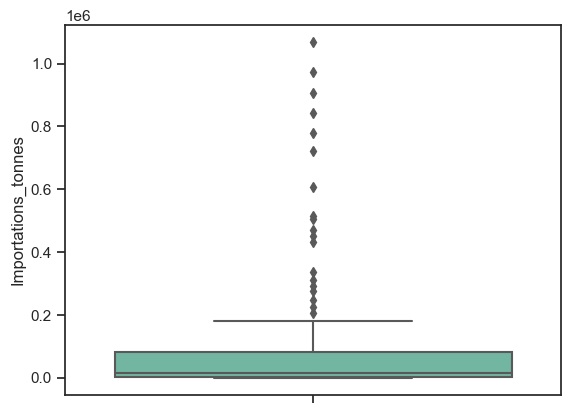

Taux_dependance_importations


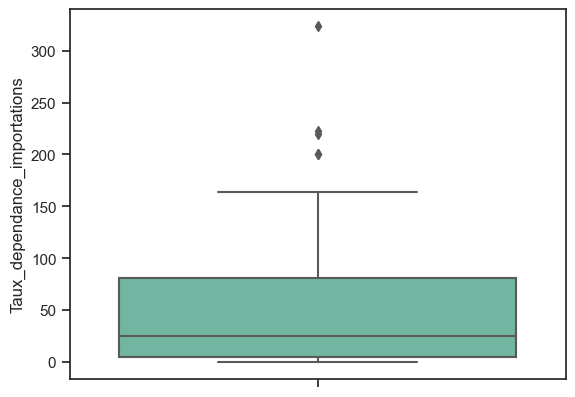

Taux_auto_suffisance


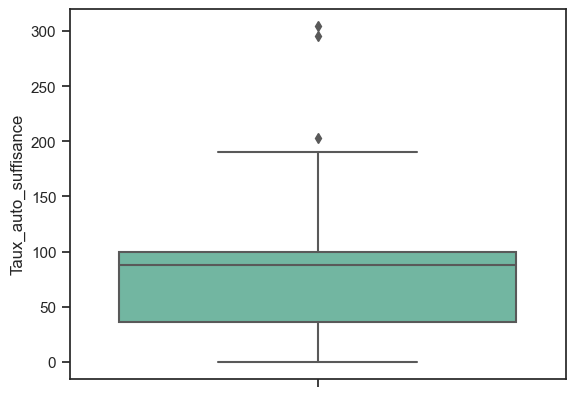

Evolution_pop


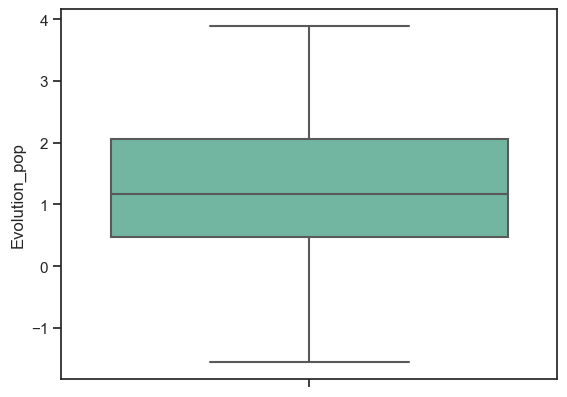

Stabilite_politique


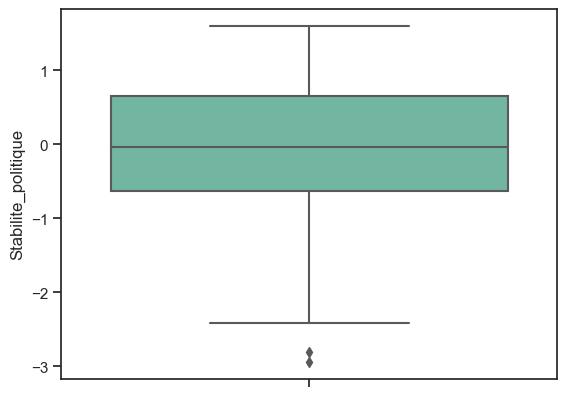

Evolution_pib_nat


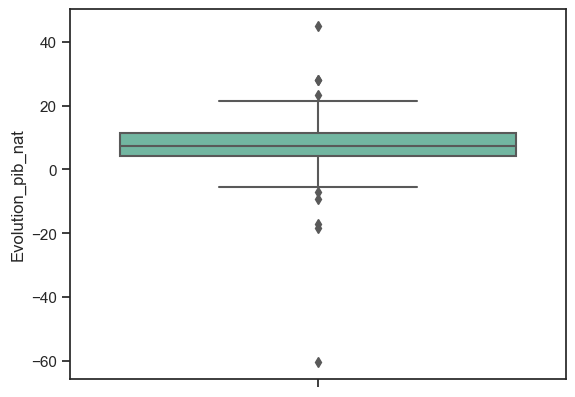

Pib_hab


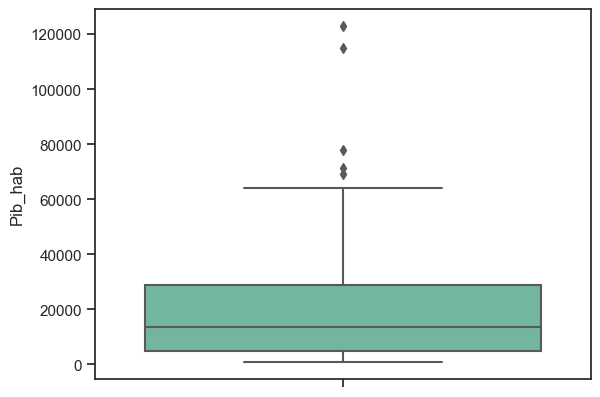

Taux_inflation_ali


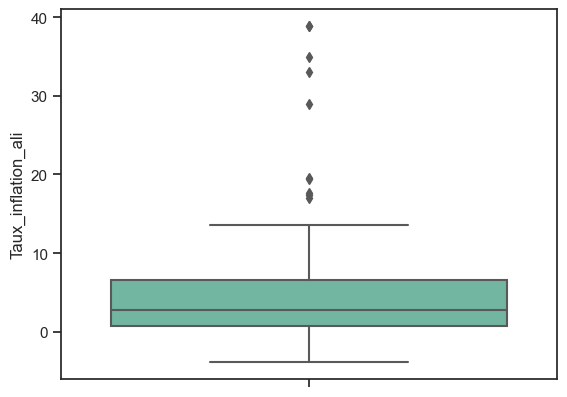

Prix_viande/Kg


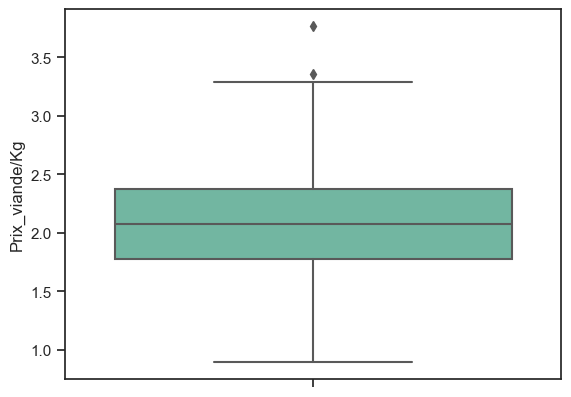

Part_importations_poulet


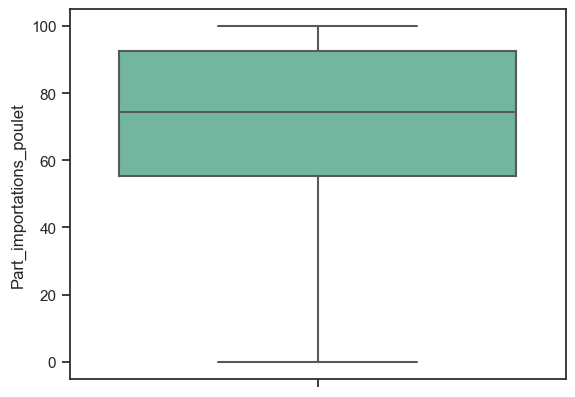

Distance_to_France


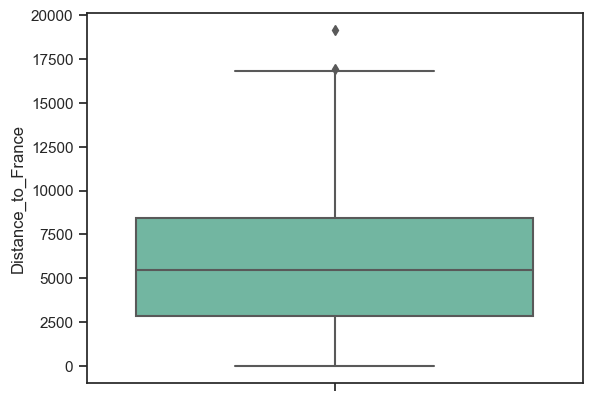

In [236]:
# Sélection des variables quantitatives
quant_vars = df_final.select_dtypes(include=['float64', 'int32'])

# Tracé des boxplots pour chaque variable
sns.set(style="ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(y=var, data=quant_vars, palette="Set2")
    plt.show()

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">4.2 - Analyse de la normalité </h3>

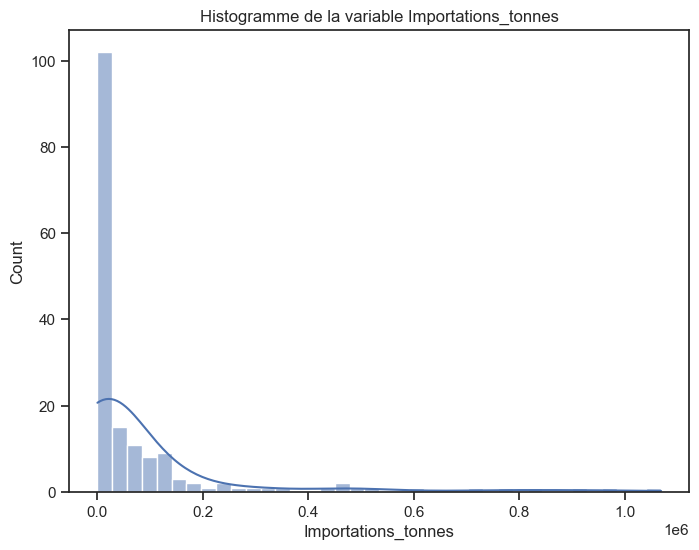

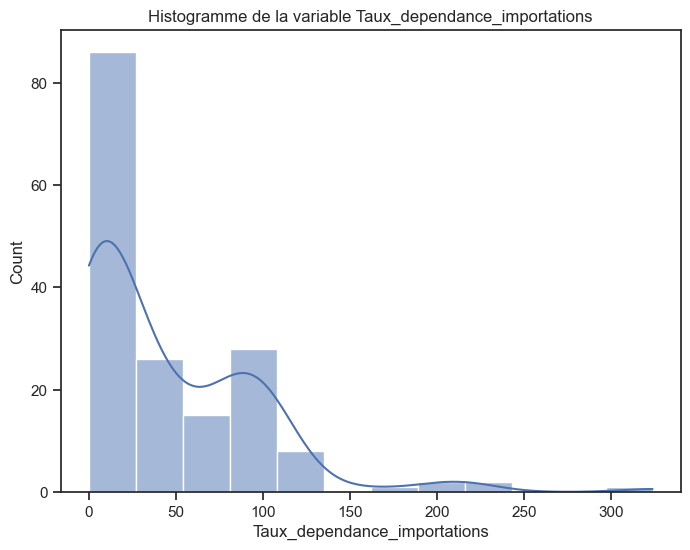

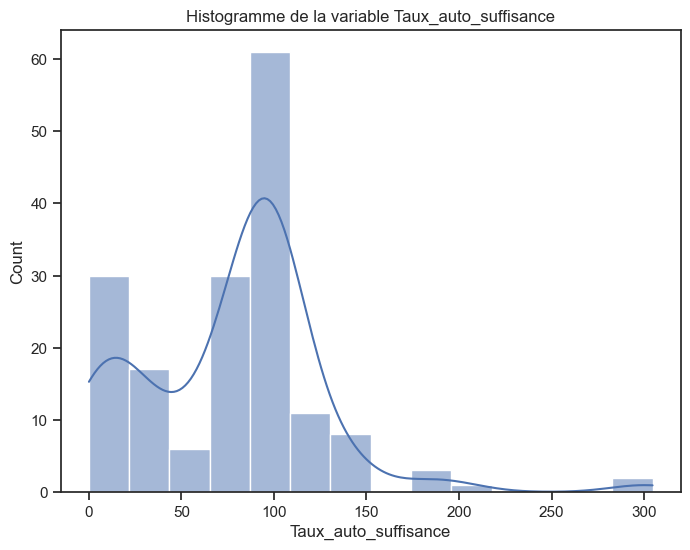

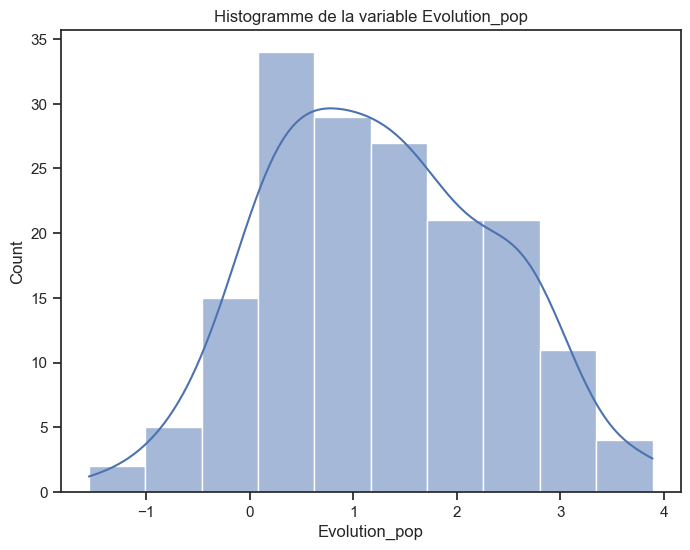

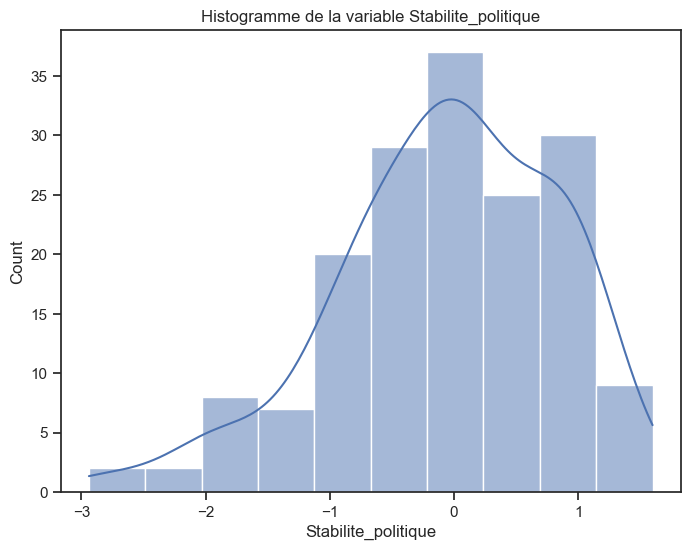

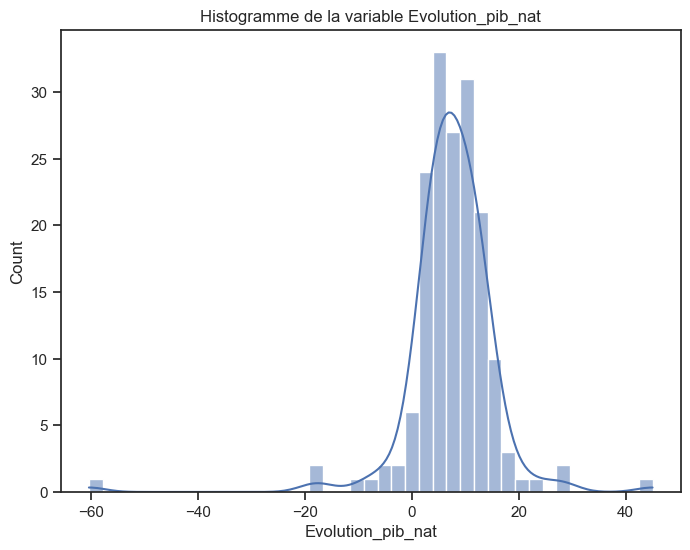

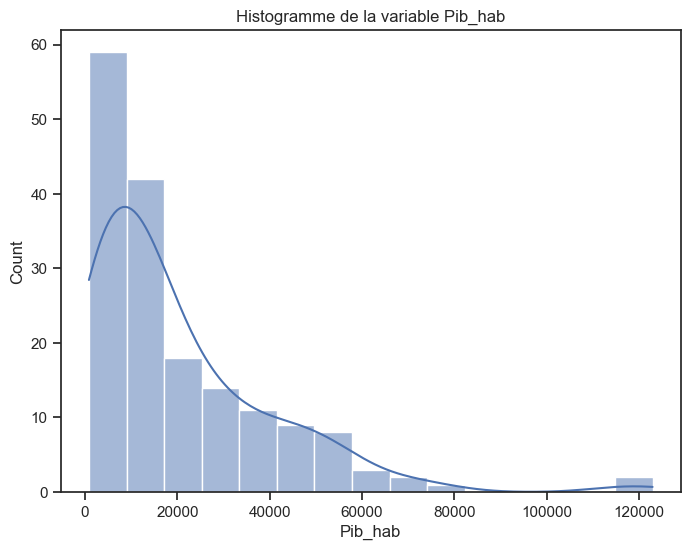

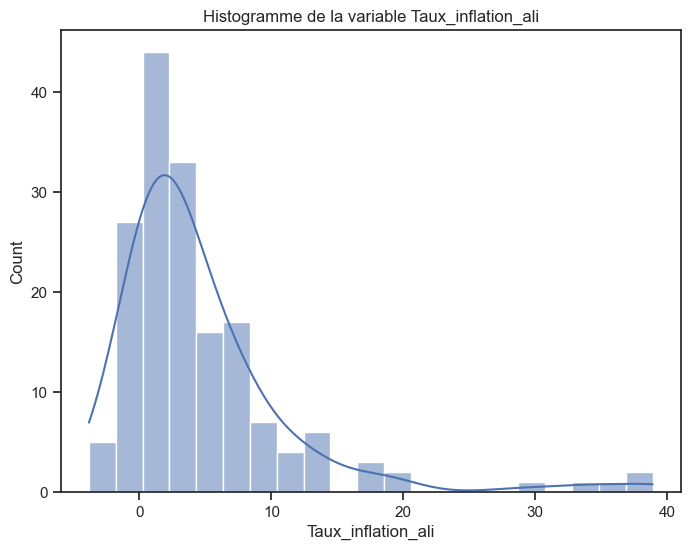

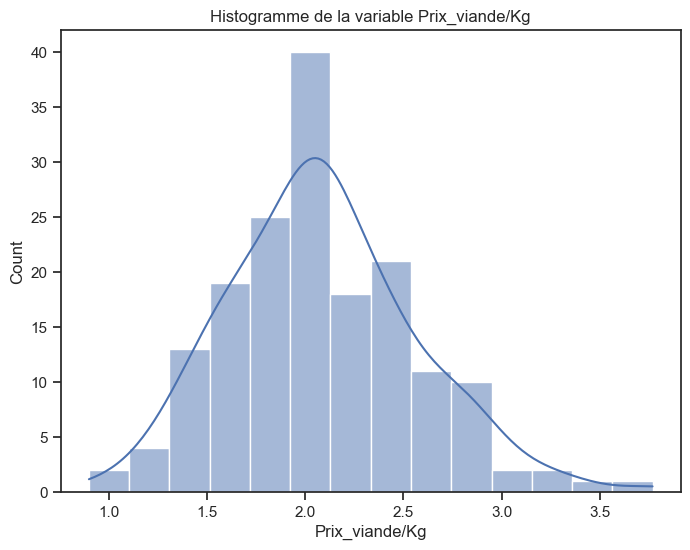

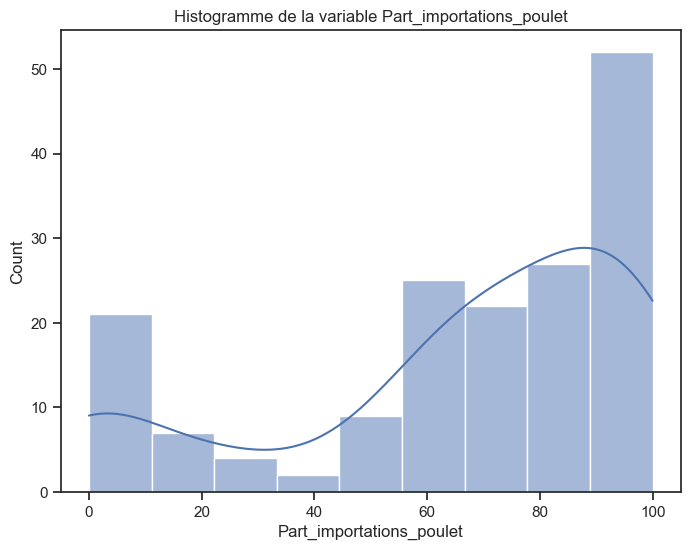

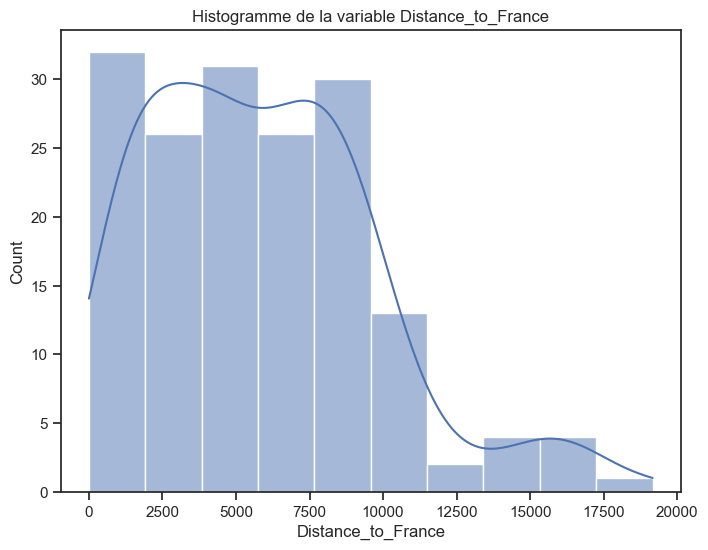

In [237]:
# Analyse graphique de la normalité pour chaque variable

for column in quant_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_final, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

In [238]:
# Tests de normalité (shapiro)

normality_df = pd.DataFrame(columns=['Variable', 'P-value', 'Normalite'])

# Boucle pour calculer les tests de normalité pour chaque variable
for var in quant_vars:
    stat, p = shapiro(quant_vars[var])
    normalite = 'Normal' if p > 0.05 else 'Not Normal'
    normality_df = normality_df.append({'Variable': var, 'P-value': p, 'Normalite': normalite}, ignore_index=True)

# Affichage du DataFrame des résultats des tests de normalité
print(normality_df)

                        Variable       P-value   Normalite
0            Importations_tonnes  2.034412e-21  Not Normal
1   Taux_dependance_importations  1.214376e-13  Not Normal
2           Taux_auto_suffisance  3.556812e-10  Not Normal
3                  Evolution_pop  2.190266e-01      Normal
4            Stabilite_politique  3.664563e-04  Not Normal
5              Evolution_pib_nat  7.832436e-16  Not Normal
6                        Pib_hab  1.291980e-13  Not Normal
7             Taux_inflation_ali  9.940368e-17  Not Normal
8                 Prix_viande/Kg  1.010136e-01      Normal
9       Part_importations_poulet  4.215456e-12  Not Normal
10            Distance_to_France  9.223363e-07  Not Normal


C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\266639090.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_df = normality_df.append({'Variable': var, 'P-value': p, 'Normalite': normalite}, ignore_index=True)
C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\266639090.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_df = normality_df.append({'Variable': var, 'P-value': p, 'Normalite': normalite}, ignore_index=True)
C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\266639090.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_df = normality_df.append({'Variable': var, 'P-value': p, 'Normalite': normalite}, ignore_index=True)
C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\266639090.py:9: Fu

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Recherche de corrélations </h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">5.1 - Recherche de corrélations simples </h3>

In [239]:
# Importation des librairies supplémentaires

import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal, levene, wilcoxon

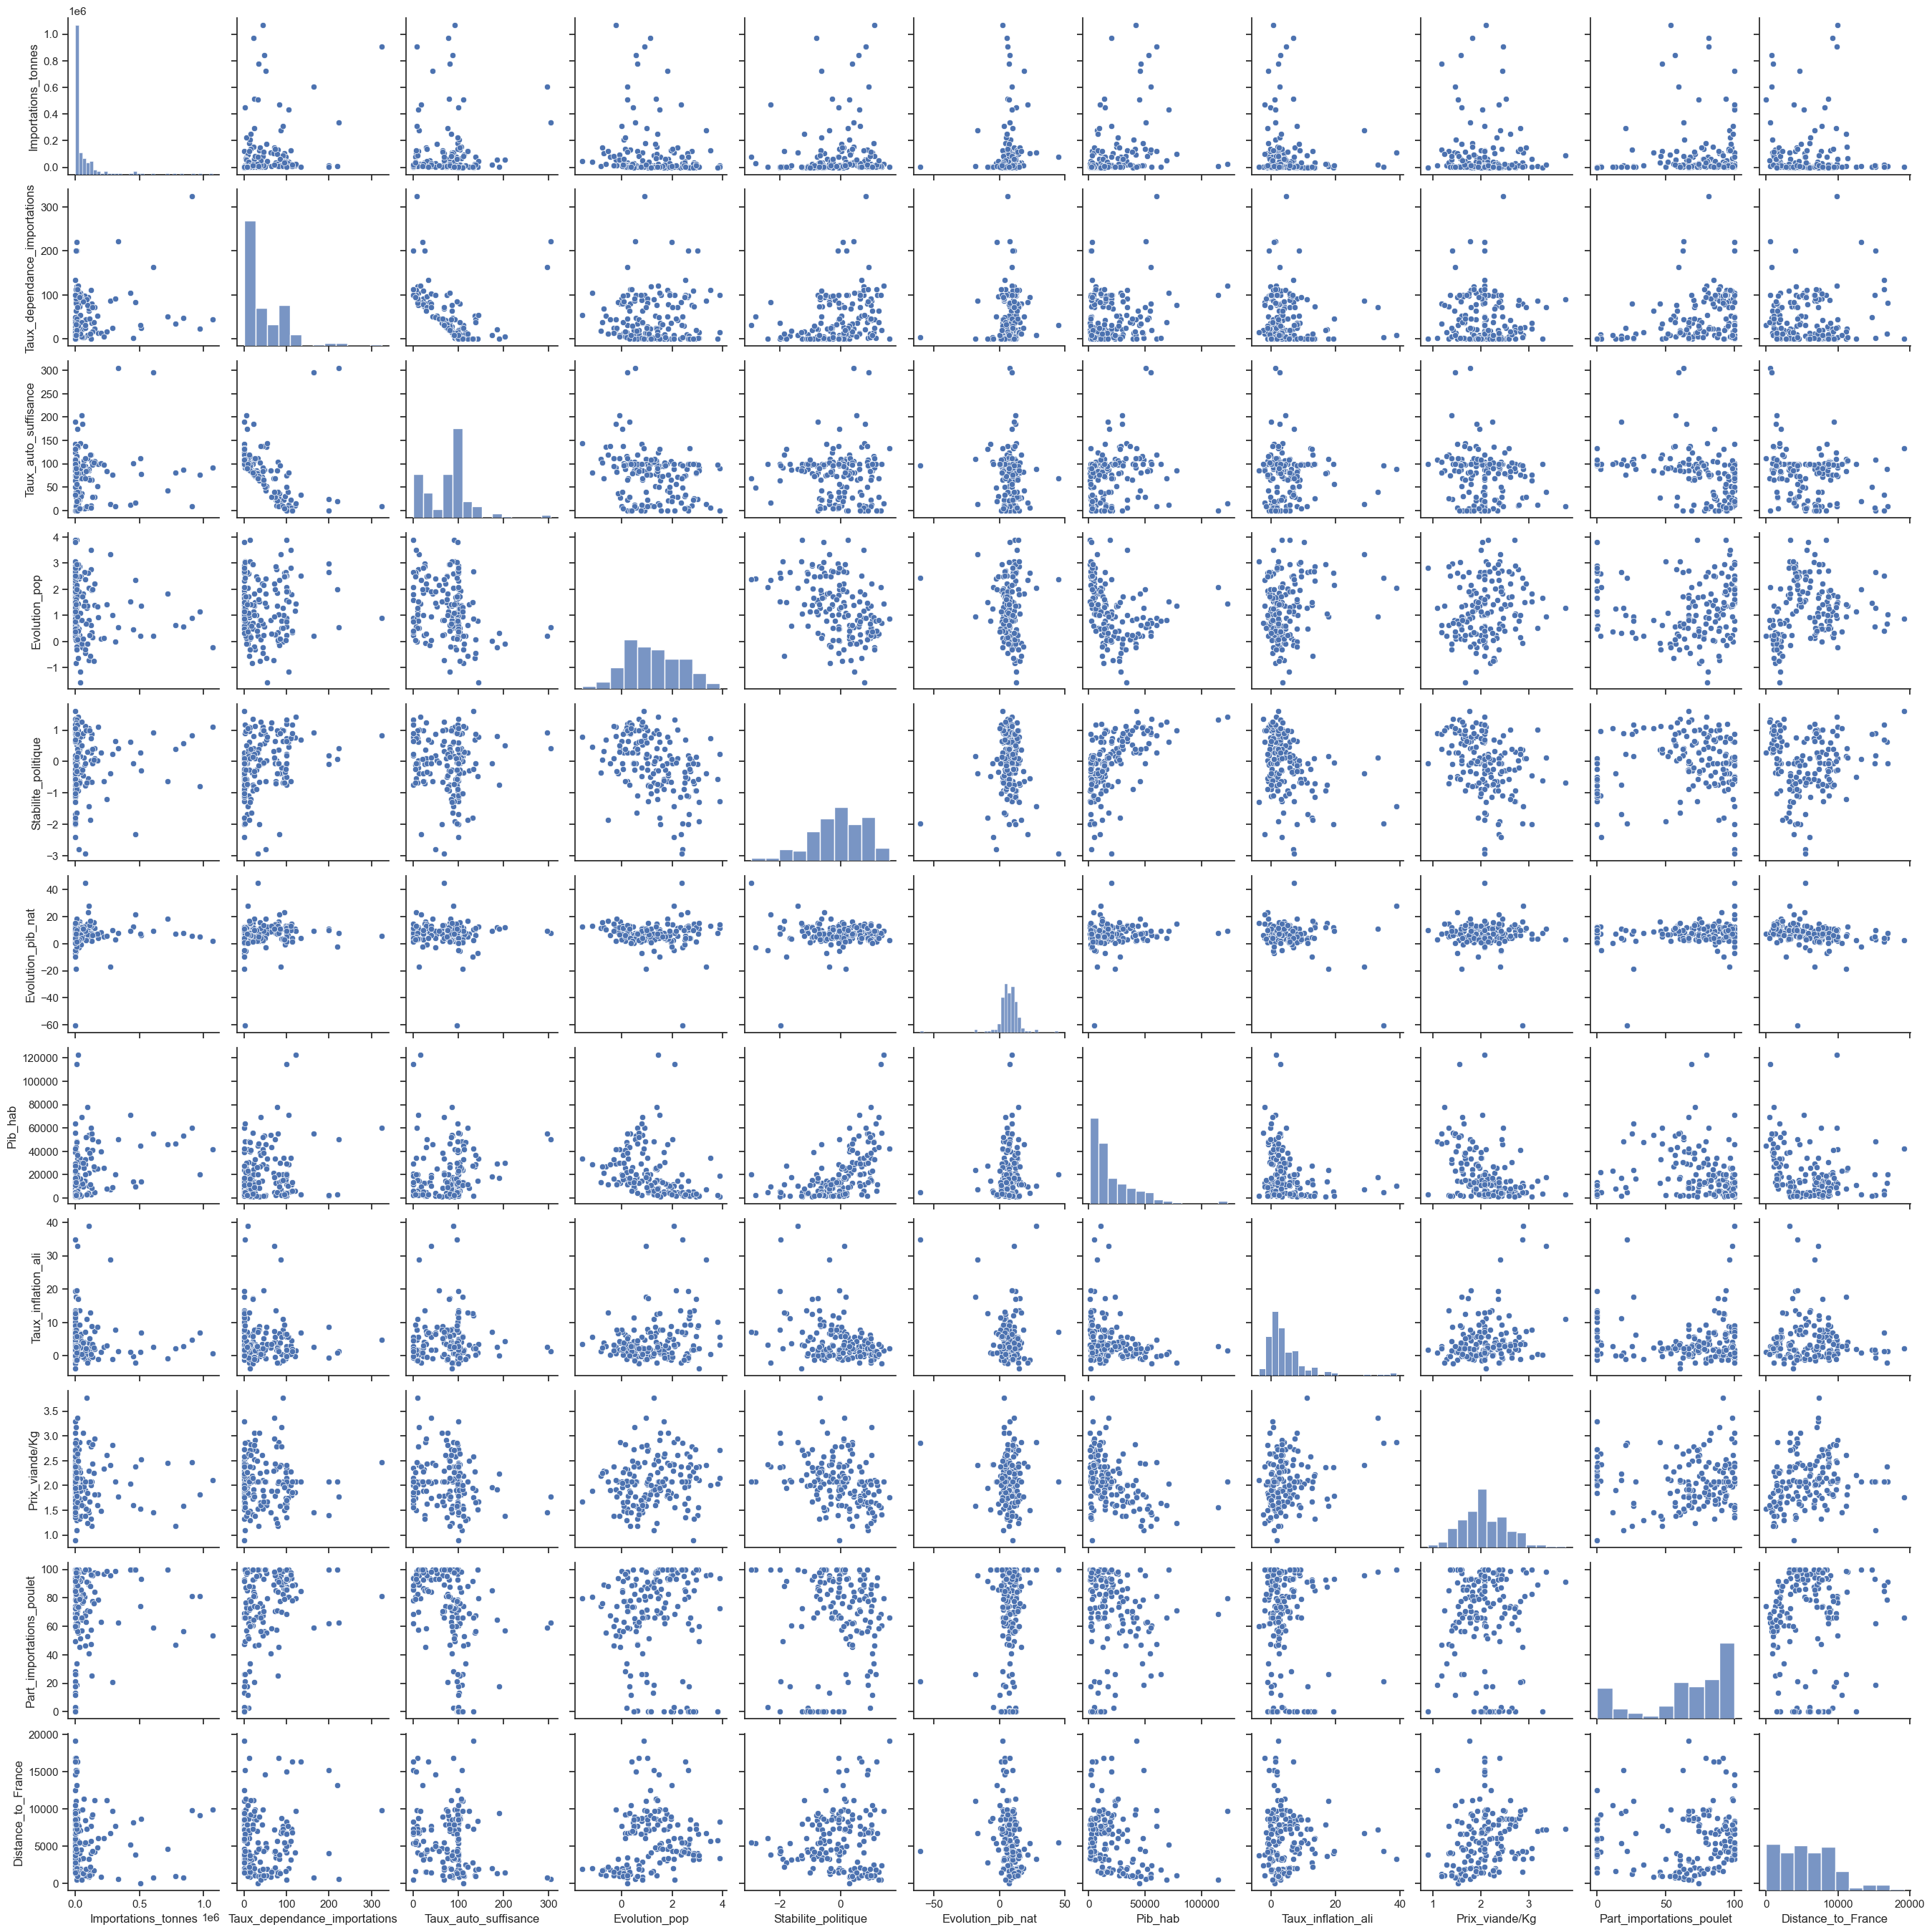

In [240]:
# Analyse graphique des relations entre les variables quantitatives

sns.pairplot(df_final,kind="scatter")

In [241]:
# à première vue, les variables ne semblent pas fortement corrélées

# Les plus corrélées semblent être l'importation, le TDI et le TAS précédemment calculés, 
# or nous avons vraiment besoin de ces infos

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\1991026214.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_final.corr()


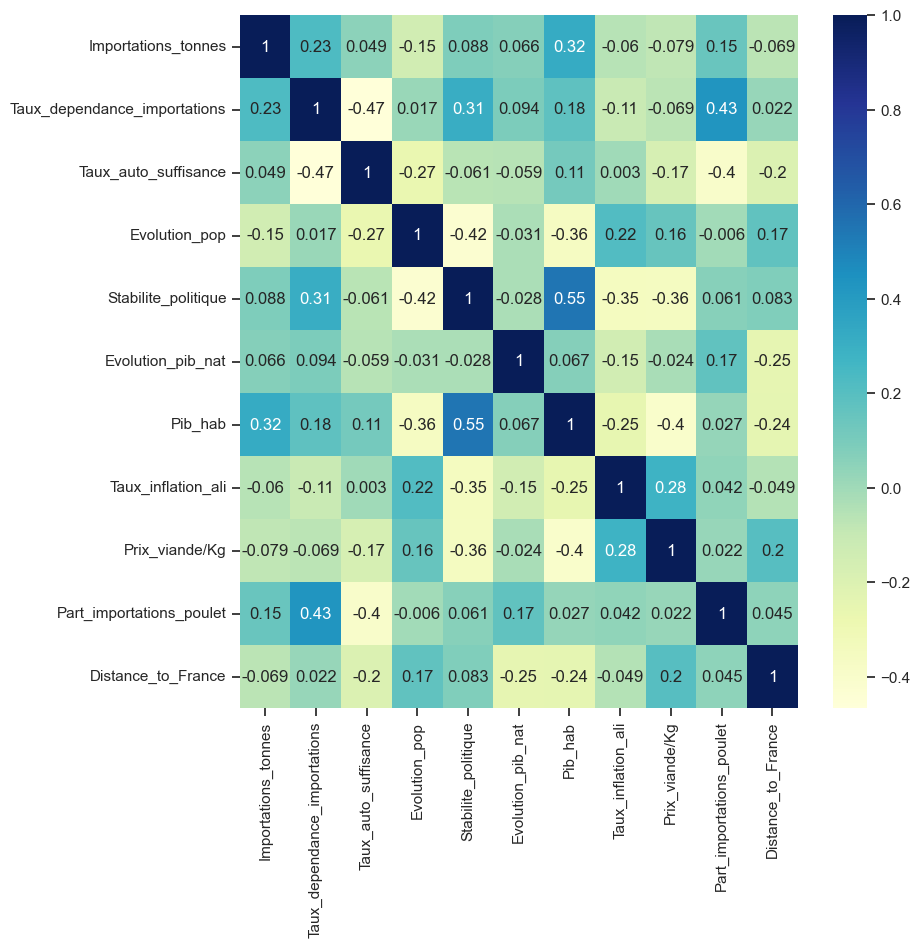

In [242]:
# Tableau de corrélation et heatmap (corrélation de pearson)

corr_matrix = df_final.corr()

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\3103018773.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_final.corr(method='spearman')


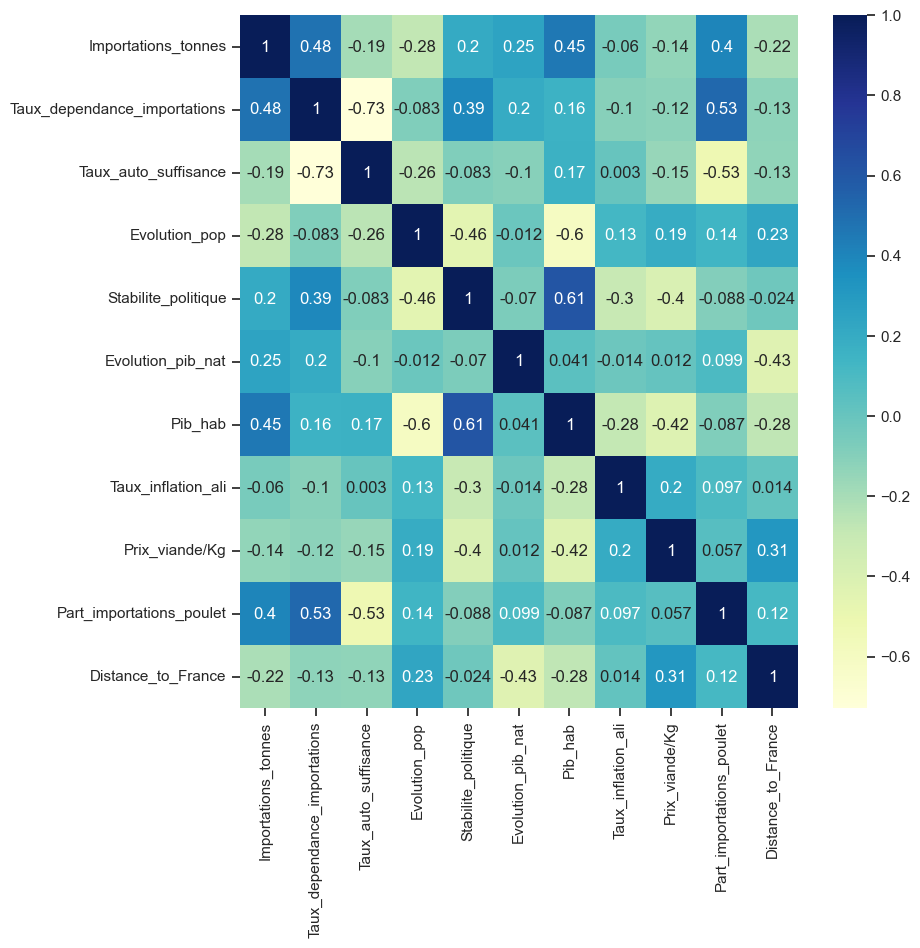

In [243]:
# Tableau de corrélation et heatmap (corrélation de spearman)

corr_matrix = df_final.corr(method='spearman')

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

C:\Users\leacr\AppData\Local\Temp\ipykernel_2856\2500853165.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_final.corr(method='kendall')


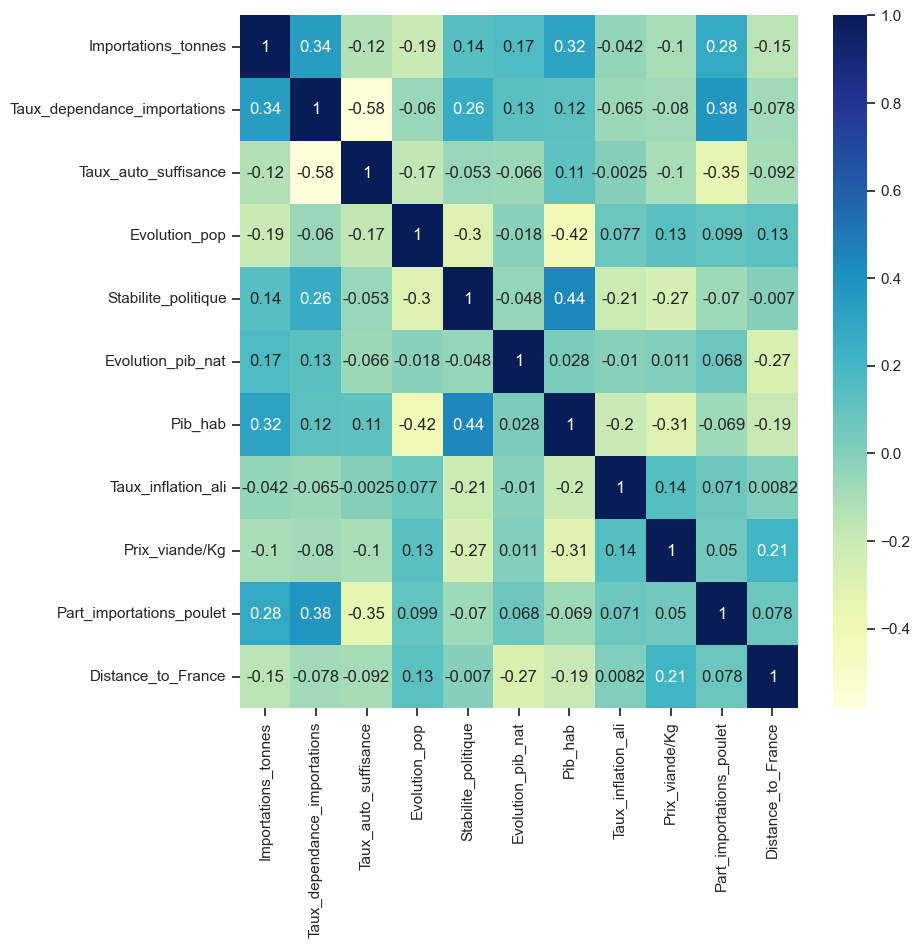

In [244]:
# Tableau de corrélation et heatmap (corrélation de kendall)

corr_matrix = df_final.corr(method='kendall')

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

In [245]:
# Sélection des variables

In [246]:
# Problème avec la part d'importation en poulet, risque de redondance et de saturer l'info 

df_final = df_final.drop(columns={'Part_importations_poulet'})

In [247]:
# Les variables les plus corrélées sont l'importation, le TAS et le TDI, indispensables pour l'étude de marché

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">5.2 - Recherche de colinéarité </h3>

In [248]:
df_final.index = df_final['Pays']
df_final = df_final.drop(columns={'Pays'})

In [249]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Importations_tonnes           169 non-null    int32  
 1   Taux_dependance_importations  169 non-null    float64
 2   Taux_auto_suffisance          169 non-null    float64
 3   Evolution_pop                 169 non-null    float64
 4   Stabilite_politique           169 non-null    float64
 5   Evolution_pib_nat             169 non-null    float64
 6   Pib_hab                       169 non-null    float64
 7   Taux_inflation_ali            169 non-null    float64
 8   Prix_viande/Kg                169 non-null    float64
 9   Distance_to_France            169 non-null    float64
dtypes: float64(9), int32(1)
memory usage: 13.9+ KB


In [250]:
df_final

,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance,Evolution_pop,Stabilite_politique,Evolution_pib_nat,Pib_hab,Taux_inflation_ali,Prix_viande/Kg,Distance_to_France
Pays,,,,,,,,,,
Afghanistan,29000,50.877193,49.122807,2.412953,-2.80,-2.526962,2096.100000,6.957529,2.079079,5446.50
Afrique du Sud,514000,24.268178,78.706327,1.373032,-0.28,6.063845,13950.500000,6.902628,2.521429,8629.33
Albanie,38000,80.851064,27.659574,-0.049546,0.38,16.411324,12771.000000,3.924577,2.866667,1550.33
Algérie,2000,0.722022,99.277978,2.027629,-0.92,2.830096,11809.500000,5.040496,2.295238,2003.34
Allemagne,842000,48.418631,87.061530,0.563777,0.59,7.683712,53071.500000,2.762497,1.585714,757.67
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,4000,133.333333,33.333333,2.511296,0.70,3.937761,3031.200000,6.884776,2.079079,16399.05
Viet Nam,291000,24.129353,76.119403,0.999268,0.23,10.219479,9050.700000,-1.072609,2.816667,9772.99
Yémen,78000,31.707317,68.292683,2.385013,-2.94,45.020049,20336.109697,7.161697,2.079079,5480.06


In [251]:
# test de colinéarité 1
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Ajouter une colonne constante pour la régression linéaire
X = sm.tools.tools.add_constant(df_final.iloc[:, 1:])

# Calculer les VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print(vif_data)

                       Variable        VIF
0                         const  47.402039
1  Taux_dependance_importations   1.458359
2          Taux_auto_suffisance   1.513131
3                 Evolution_pop   1.460216
4           Stabilite_politique   2.076895
5             Evolution_pib_nat   1.122337
6                       Pib_hab   1.723518
7            Taux_inflation_ali   1.240364
8                Prix_viande/Kg   1.369435
9            Distance_to_France   1.328733


In [252]:
# Test 2 

x = df_final.copy()
X_const = sm.tools.tools.add_constant(x)

vif = pd.Series([variance_inflation_factor(X_const.values, i) for i in range(x.shape[1])], 
                index = x.columns)
print("Variance Inflation Factors:")
print(vif)

Variance Inflation Factors:
Importations_tonnes             47.714003
Taux_dependance_importations     1.220871
Taux_auto_suffisance             1.561668
Evolution_pop                    1.531232
Stabilite_politique              1.473416
Evolution_pib_nat                2.146561
Pib_hab                          1.123588
Taux_inflation_ali               1.895556
Prix_viande/Kg                   1.240404
Distance_to_France               1.370281
dtype: float64


In [253]:
# Recherche des variables à sélectionner

from sklearn.feature_selection import VarianceThreshold

In [254]:
# Enregistrement de l'index dans une variable (ids des lignes)

df = df_final.copy()

names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Tunisie', 'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe'],
      dtype='object', name='Pays', length=169)

In [255]:
# Enregistrement des features (noms des colonnes)

features_names = df.columns
features_names

Index(['Importations_tonnes', 'Taux_dependance_importations',
       'Taux_auto_suffisance', 'Evolution_pop', 'Stabilite_politique',
       'Evolution_pib_nat', 'Pib_hab', 'Taux_inflation_ali', 'Prix_viande/Kg',
       'Distance_to_France'],
      dtype='object')

In [256]:
X = df.values

In [257]:
X.var(axis=0)

array([3.47932913e+10, 2.68236571e+03, 2.44542855e+03, 1.18087602e+00,
       8.01583992e-01, 7.30518216e+01, 4.14805626e+08, 4.74047490e+01,
       2.28593724e-01, 1.52419481e+07])

In [258]:
selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [259]:
# Aucune des variables ne varie que légèrement, on peut donc toutes les conserver

In [260]:
df

,Importations_tonnes,Taux_dependance_importations,Taux_auto_suffisance,Evolution_pop,Stabilite_politique,Evolution_pib_nat,Pib_hab,Taux_inflation_ali,Prix_viande/Kg,Distance_to_France
Pays,,,,,,,,,,
Afghanistan,29000,50.877193,49.122807,2.412953,-2.80,-2.526962,2096.100000,6.957529,2.079079,5446.50
Afrique du Sud,514000,24.268178,78.706327,1.373032,-0.28,6.063845,13950.500000,6.902628,2.521429,8629.33
Albanie,38000,80.851064,27.659574,-0.049546,0.38,16.411324,12771.000000,3.924577,2.866667,1550.33
Algérie,2000,0.722022,99.277978,2.027629,-0.92,2.830096,11809.500000,5.040496,2.295238,2003.34
Allemagne,842000,48.418631,87.061530,0.563777,0.59,7.683712,53071.500000,2.762497,1.585714,757.67
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,4000,133.333333,33.333333,2.511296,0.70,3.937761,3031.200000,6.884776,2.079079,16399.05
Viet Nam,291000,24.129353,76.119403,0.999268,0.23,10.219479,9050.700000,-1.072609,2.816667,9772.99
Yémen,78000,31.707317,68.292683,2.385013,-2.94,45.020049,20336.109697,7.161697,2.079079,5480.06


In [261]:
# Exportation en fichier csv

df.to_csv('Table_finale.csv')